In [2519]:
# pip install pyxlsb

# Loading the data

In [2520]:
import pandas as pd
import pyxlsb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm


df = pd.read_excel("/Users/adityaajit/Downloads/Problem_Statement_3.1.1/Base_Problem_DataSet.xlsb")

In [2521]:
df

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,...,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Service,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Service,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Retired,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Commercial,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Service,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Commercial,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Govt Job,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Service,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0


# Getting familiar with data

In [2522]:
df.shape

(121856, 39)

In [2523]:
print(list(df.columns))

['ID', 'Patron_Salary', 'Automobile_Possession', 'Two-Wheeler_Ownership', 'Ongoing_Borrowing', 'Residence_Proprietorship', 'Offspring_Number', 'Loan_Capital', 'Borrowing_Periodic_Payment', 'Customer_Revenue_Category', 'Patron_Academic_Qualification', 'Customer_Conjugal_State', 'Patron_Sex', 'Borrowing_Agreement_Category', 'Customer_Living_Arrangement', 'Population_Fraction_by_Region', 'Elderliness_in_Days', 'Work_Duration_in_Days', 'Enlistment_Period_in_Days', 'Identity_Age_in_Days', 'Private_Dwelling_Duration', 'Cellphone_Marker', 'Residential_Phone_Marker', 'Employment_Phone_Operation', 'Customer_Vocation', 'Patron_Kin_Count', 'Customer_Urban_Area_Ranking', 'Request_Submission_Day', 'Request_Submission_Hour', 'Patron_Constant_Correspondence_Marker', 'Customer_Professional_Communication_Marker', 'Sort_of_Institution', 'Rating_Origin_1', 'Rating_Origin_2', 'Rating_Origin_3', 'Community_Non-Payment_Incidence', 'Telecommunication_Switch', 'Solvency_Information_Agency', 'Default']


In [2524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ID                                          121856 non-null  int64  
 1   Patron_Salary                               118249 non-null  object 
 2   Automobile_Possession                       118275 non-null  float64
 3   Two-Wheeler_Ownership                       118232 non-null  float64
 4   Ongoing_Borrowing                           118221 non-null  float64
 5   Residence_Proprietorship                    118195 non-null  float64
 6   Offspring_Number                            118218 non-null  float64
 7   Loan_Capital                                118224 non-null  object 
 8   Borrowing_Periodic_Payment                  117044 non-null  object 
 9   Customer_Revenue_Category                   118155 non-null  object 
 

In [2525]:
df.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()


,feature_type,count
0,int64,5
1,float64,15
2,object,19


In [2526]:
df.corr(numeric_only = True)

,ID,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Private_Dwelling_Duration,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,Patron_Kin_Count,Customer_Urban_Area_Ranking,Request_Submission_Day,Request_Submission_Hour,Rating_Origin_1,Rating_Origin_2,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
ID,1.000000,-0.003510,-0.001487,-0.000836,0.000588,-0.008734,0.003739,-0.002055,-0.005787,0.003871,-0.006603,-0.002193,0.001520,-0.001599,-0.001940,-0.000631,0.005373,0.000317,0.003077,0.000432
Automobile_Possession,-0.003510,1.000000,-0.000409,-0.001577,-0.008344,0.100579,NaN,-0.004026,0.011443,-0.008597,0.148582,-0.022454,-0.004885,0.013634,-0.058389,0.016107,0.023986,0.036028,-0.036618,-0.023221
Two-Wheeler_Ownership,-0.001487,-0.000409,1.000000,0.001545,0.002125,0.002209,0.005183,-0.004123,-0.002272,-0.005849,0.003196,0.000219,-0.003857,0.002122,-0.005177,0.001188,-0.004621,-0.005310,-0.000684,0.000431
Ongoing_Borrowing,-0.000836,-0.001577,0.001545,1.000000,-0.005709,0.001789,-0.005846,0.002904,0.001333,0.000222,-0.000822,-0.002666,0.001355,0.004346,-0.000964,0.000458,0.007305,0.008826,0.009045,0.000240
Residence_Proprietorship,0.000588,-0.008344,0.002125,-0.005709,1.000000,-0.003286,0.001308,-0.001940,-0.112196,-0.040484,0.007500,0.003755,0.011574,-0.105234,0.079623,0.003951,0.009756,-0.023267,0.067270,-0.001011
Offspring_Number,-0.008734,0.100579,0.002209,0.001789,-0.003286,1.000000,0.004485,0.001667,0.052229,-0.030280,0.880352,0.025100,0.000803,-0.009562,-0.135047,-0.006385,-0.008503,0.008873,-0.036770,0.019687
Private_Dwelling_Duration,0.003739,NaN,0.005183,-0.005846,0.001308,0.004485,1.000000,-0.003589,-0.053890,-0.062764,-0.015369,0.089302,0.014701,-0.068244,-0.085453,-0.022392,-0.050396,0.004120,-0.009777,0.047513
Cellphone_Marker,-0.002055,-0.004026,-0.004123,0.002904,-0.001940,0.001667,-0.003589,1.000000,0.001435,0.001792,0.000489,0.000172,-0.003027,-0.000831,NaN,NaN,-0.000237,NaN,NaN,0.000849
Residential_Phone_Marker,-0.005787,0.011443,-0.002272,0.001333,-0.112196,0.052229,-0.053890,0.001435,1.000000,0.290171,0.065822,0.013565,-0.016965,0.036800,-0.076378,-0.006064,-0.013785,0.048182,-0.077085,0.021593
Employment_Phone_Operation,0.003871,-0.008597,-0.005849,0.000222,-0.040484,-0.030280,-0.062764,0.001792,0.290171,1.000000,-0.014515,-0.078998,-0.011408,0.061976,0.076516,0.013852,0.058368,0.070955,-0.029574,-0.025682


In [2527]:
corr['Default'].sort_values(ascending = False).to_frame('corr_value').reset_index()

,index,corr_value
0,Default,1.000000
1,Customer_Urban_Area_Ranking,0.057672
2,Solvency_Information_Agency,0.028772
3,Residence_Proprietorship,0.014981
4,Residential_Phone_Marker,0.012833
5,Offspring_Number,0.009249
6,Patron_Kin_Count,0.003763
7,Ongoing_Borrowing,-0.004595
8,Two-Wheeler_Ownership,-0.009028
9,Borrowing_Periodic_Payment,-0.011816


In [2528]:
#Splitting data on default: 0 is those whose have paid off the loans, 1 is those who defaulted

df.Default.value_counts()

0    112011
1      9845
Name: Default, dtype: int64

<Axes: ylabel='Default'>

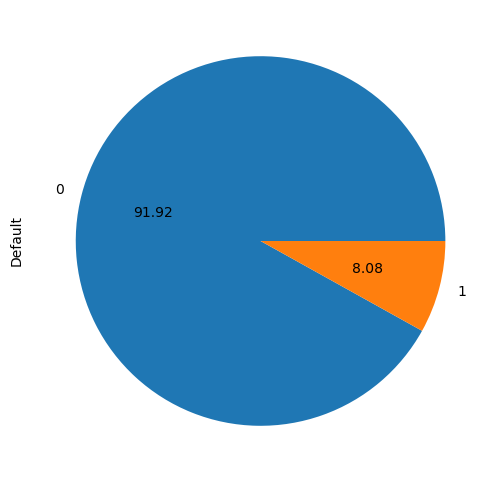

In [2529]:
df['Default'].value_counts().plot.pie(autopct='%.2f',figsize=(6,6))


# Data Processing

Removing features associated with >85% missing values
Removing constant features
Removing duplicates features
Analysing each features manually

In [2530]:
#Percentage of missing values in each feature

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ID - 0%
Patron_Salary - 3%
Automobile_Possession - 3%
Two-Wheeler_Ownership - 3%
Ongoing_Borrowing - 3%
Residence_Proprietorship - 3%
Offspring_Number - 3%
Loan_Capital - 3%
Borrowing_Periodic_Payment - 4%
Customer_Revenue_Category - 3%
Patron_Academic_Qualification - 3%
Customer_Conjugal_State - 3%
Patron_Sex - 2%
Borrowing_Agreement_Category - 3%
Customer_Living_Arrangement - 3%
Population_Fraction_by_Region - 4%
Elderliness_in_Days - 3%
Work_Duration_in_Days - 3%
Enlistment_Period_in_Days - 3%
Identity_Age_in_Days - 5%
Private_Dwelling_Duration - 66%
Cellphone_Marker - 0%
Residential_Phone_Marker - 0%
Employment_Phone_Operation - 0%
Customer_Vocation - 34%
Patron_Kin_Count - 2%
Customer_Urban_Area_Ranking - 2%
Request_Submission_Day - 2%
Request_Submission_Hour - 3%
Patron_Constant_Correspondence_Marker - 0%
Customer_Professional_Communication_Marker - 0%
Sort_of_Institution - 3%
Rating_Origin_1 - 56%
Rating_Origin_2 - 5%
Rating_Origin_3 - 22%
Community_Non-Payment_Incidence - 51%
T

<Axes: >

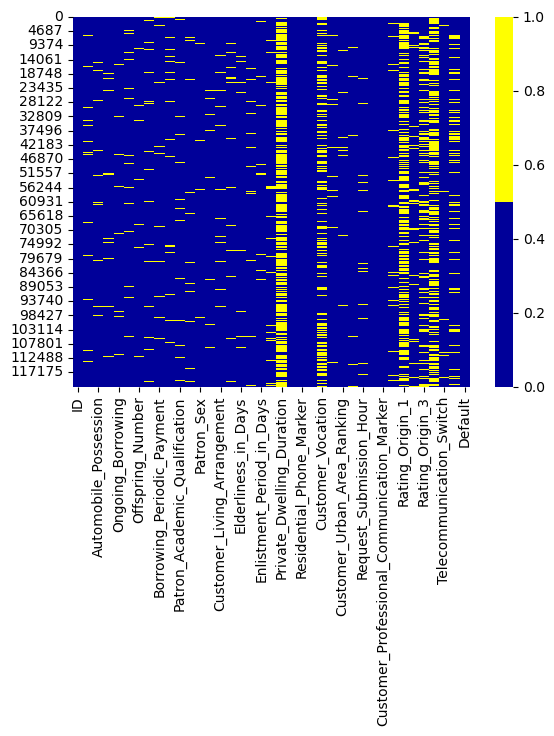

In [2531]:
cols = df.columns[:40] # first 30 columns
colours = ['#000099', '#ffff00'] # yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

The private dwelling duration has many null values

#### Removing duplicate rows

In [2532]:
# Remove Duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(121856, 39)

#### Converting the datatype to numeric type for certaing values


In [2533]:
# Converting the values which are supposed to be int or float type but changed to object type due to special characters
df['Rating_Origin_3'] = pd.to_numeric(df['Rating_Origin_3'], errors='coerce')
df["Patron_Salary"] = pd.to_numeric(df["Patron_Salary"], errors = 'coerce')
df["Loan_Capital"] = pd.to_numeric(df["Loan_Capital"], errors = 'coerce')
df["Borrowing_Periodic_Payment"] = pd.to_numeric(df["Borrowing_Periodic_Payment"], errors = 'coerce')
df["Enlistment_Period_in_Days"] = pd.to_numeric(df["Enlistment_Period_in_Days"], errors = 'coerce')
df["Identity_Age_in_Days"] = pd.to_numeric(df["Identity_Age_in_Days"], errors = 'coerce')
df["Work_Duration_in_Days"] = pd.to_numeric(df["Work_Duration_in_Days"], errors = 'coerce')
df["Private_Dwelling_Duration"] = pd.to_numeric(df["Private_Dwelling_Duration"], errors = 'coerce')

### Data Processing and handling missing values

#### Multivariate analysis using heatmap

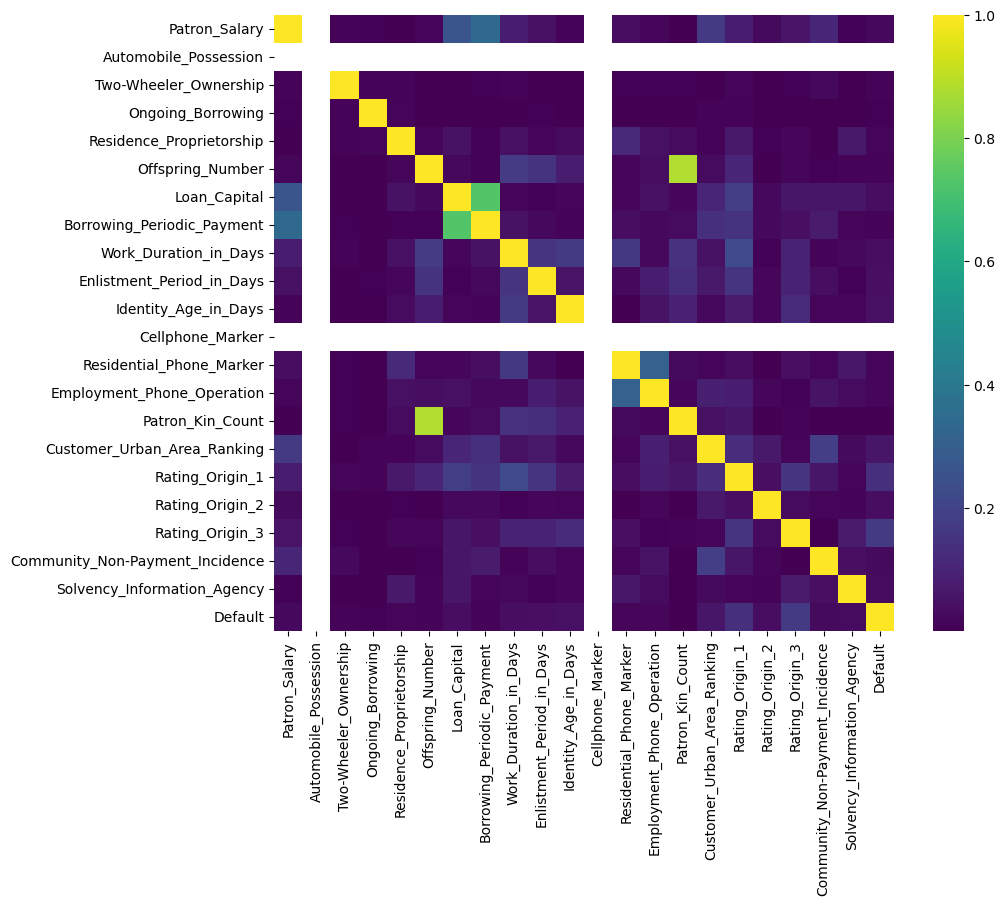

In [2534]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr.abs(), cmap ='viridis' )
plt.show()

#### Analysing features manually

In [2535]:
#Check correlation between default status and the feature

def corr_def(col):
    corr = df[col].corr(df["Default"])
    if corr < 0:
        print("Negative correlation of {} with the default status".format(corr))
    elif corr > 0:
        print("Positive correlation of {} with the default status".format(corr))
    else:
        print("No correlation with the default status")

In [2536]:
# Impute mode function

def mode_impute(ix):
    df[ix].fillna(df[ix].mode()[0], inplace=True)
    null_count = df[ix].isnull().sum()
    return (f"Imputed by mode of the feature, the null values remaining are {null_count}")

In [2537]:
#Imputing median function

def median_impute(iy):
    med = df[iy].median()
    df[iy] = df[iy].fillna(med)
    null_value_count = df[iy].isnull().sum()
    return (f"Imputed by median of the feature, the null values remaining are {null_value_count}")
    

In [2538]:
#Visualization function

def plot_feature(col_name, Category):
    """
    Visualize a variable with and without faceting on the Default status.
    - col_name is the feature name in the dataframe
    - Category is True if the feature is categorical, False otherwise
    """
    
    if Category == True:
        #Independent categorical
        df[col_name].value_counts(normalize=True).plot.bar(figsize=(20,10), title=col_name)
        plt.show()

        #Categorical Independent Variable vs Target Variable
        col_name=pd.crosstab(df[col_name],df["Default"])
        col_name.div(col_name.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
        plt.show()
        
    elif Category == False:
        #Independent Variable (Numerical)
        plt.figure(figsize=(5, 3))

        # Assuming df is your DataFrame and "Patron Salary" is the column name
        sns.histplot(df[col_name], bins=30, kde=True, color='skyblue')
        plt.xlabel(col_name)
        plt.ylabel('Frequency')
        plt.title(col_name)

        # Customize the appearance
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


        #Numerical Independent Variable vs Target Variable

        plt.figure(figsize=(5, 3))

        # Assuming df is your DataFrame and "Patron Salary" and "Loan Default" are column names
        sns.boxplot(x='Default', y=col_name, data=df, palette='pastel')
        plt.xlabel('Default')
        plt.ylabel(col_name)
        plt.title(col_name)

        # Customize the appearance
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        pass
        

In [2539]:
feature_to_be_removed = []


### 0 - 10 columns

In [2540]:
df.iloc[:5,:11]

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification
0,12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,Secondary
1,12138936,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Service,Graduation
2,12181264,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Service,Graduation dropout
3,12188929,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Retired,Secondary
4,12133385,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Commercial,Secondary


##### Patron_Salary

In [2541]:
corr_def('Patron_Salary')

Negative correlation of -0.021516086295665964 with the default status


As the patron salary is an important metric and necessary for a loan, we will drop the all rows the null values and handle the outliers

In [2542]:
# Handling outliers

y_axis_range = (0, 100000)

# Filter the data to include only salary values within the defined range
filtered_data = df[(df['Patron_Salary'] >= y_axis_range[0]) & (df['Patron_Salary'] <= y_axis_range[1])]

# Identify and remove outliers using a custom IQR multiplier (e.g., 3.0)
Q1 = filtered_data['Patron_Salary'].quantile(0.25)
Q3 = filtered_data['Patron_Salary'].quantile(0.75)
IQR_multiplier = 3.0  # Customize the multiplier
lower_bound = Q1 - IQR_multiplier * (Q3 - Q1)
upper_bound = Q3 + IQR_multiplier * (Q3 - Q1)

filtered_data = filtered_data[(filtered_data['Patron_Salary'] >= lower_bound) & (filtered_data['Patron_Salary'] <= upper_bound)]
df = filtered_data
df["Patron_Salary"].describe()

count    117047.000000
mean      16295.219735
std        7773.198508
min        2565.000000
25%       11250.000000
50%       14400.000000
75%       20250.000000
max       47250.000000
Name: Patron_Salary, dtype: float64

In [2543]:
# removing the null rows
df.dropna(subset=['Patron_Salary'], inplace=True)

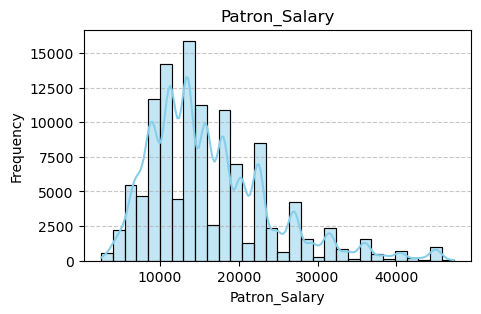

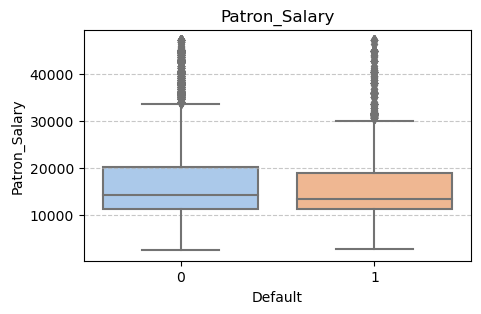

In [2544]:
plot_feature('Patron_Salary', False)

In [2545]:
df["Patron_Salary"].describe()

count    117047.000000
mean      16295.219735
std        7773.198508
min        2565.000000
25%       11250.000000
50%       14400.000000
75%       20250.000000
max       47250.000000
Name: Patron_Salary, dtype: float64

In [2546]:
df["Patron_Salary"].isnull().sum()

0

Most defaults are in the salary range of 11000 to 18000

##### Automobile_Possession

In [2547]:
df["Automobile_Possession"].value_counts()

0.0    75029
1.0    38579
Name: Automobile_Possession, dtype: int64

In [2548]:
df.Automobile_Possession.value_counts(normalize=True)

0.0    0.66042
1.0    0.33958
Name: Automobile_Possession, dtype: float64

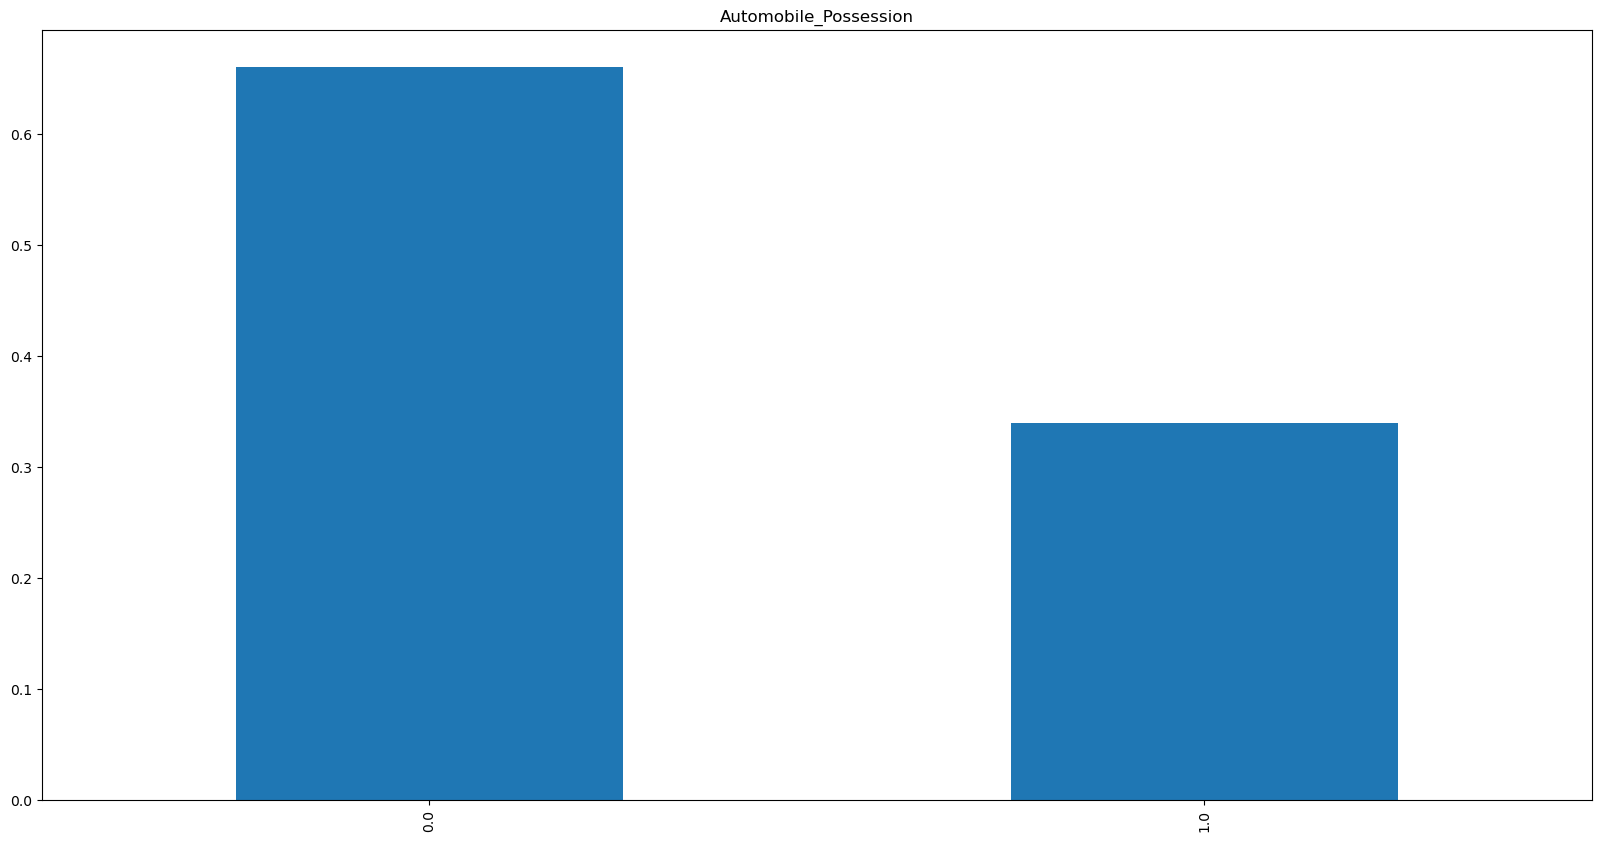

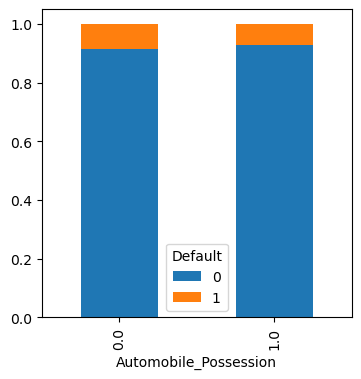

In [2549]:
plot_feature("Automobile_Possession", True)

In [2550]:
mode_impute("Automobile_Possession")

'Imputed by mode of the feature, the null values remaining are 0'

Customers with automobile possession exhibit a slight lower default percentage rate, suggesting that owning an automobile may indicate financial stability.

##### Two-Wheeler_Ownership


In [2551]:
corr_def("Two-Wheeler_Ownership")

Negative correlation of -0.0003095506446093726 with the default status


In [2552]:
df["Two-Wheeler_Ownership"].value_counts(normalize=True)

0.0    0.667847
1.0    0.332153
Name: Two-Wheeler_Ownership, dtype: float64

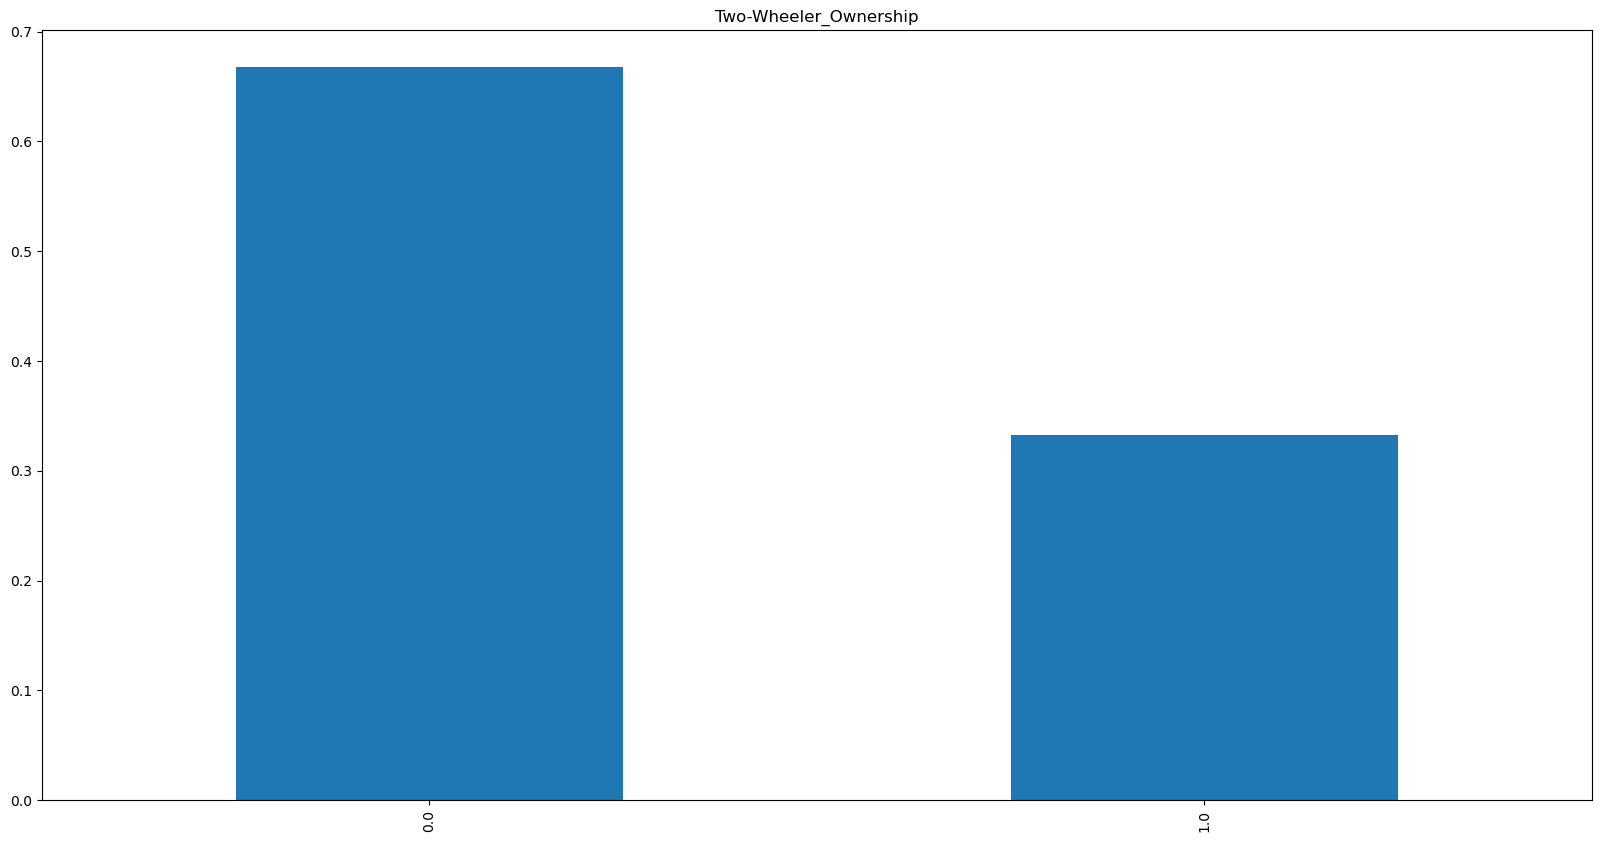

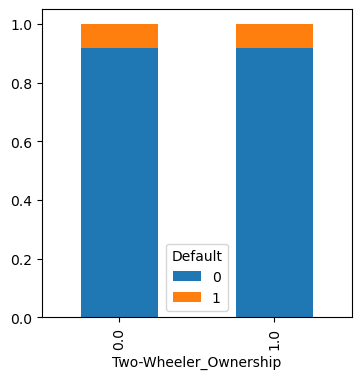

In [2553]:
plot_feature("Two-Wheeler_Ownership", True)

In [2554]:
df["Two-Wheeler_Ownership"].isnull().sum()

3476

In [2555]:
mode_impute("Two-Wheeler_Ownership")

'Imputed by mode of the feature, the null values remaining are 0'

The correlation of two wheeler is very less with the default status.

##### Ongoing_Borrowing

In [2556]:
corr_def("Ongoing_Borrowing")

Positive correlation of 0.00045855427067971954 with the default status


In [2557]:
df["Ongoing_Borrowing"].value_counts()

0.0    56775
1.0    56760
Name: Ongoing_Borrowing, dtype: int64

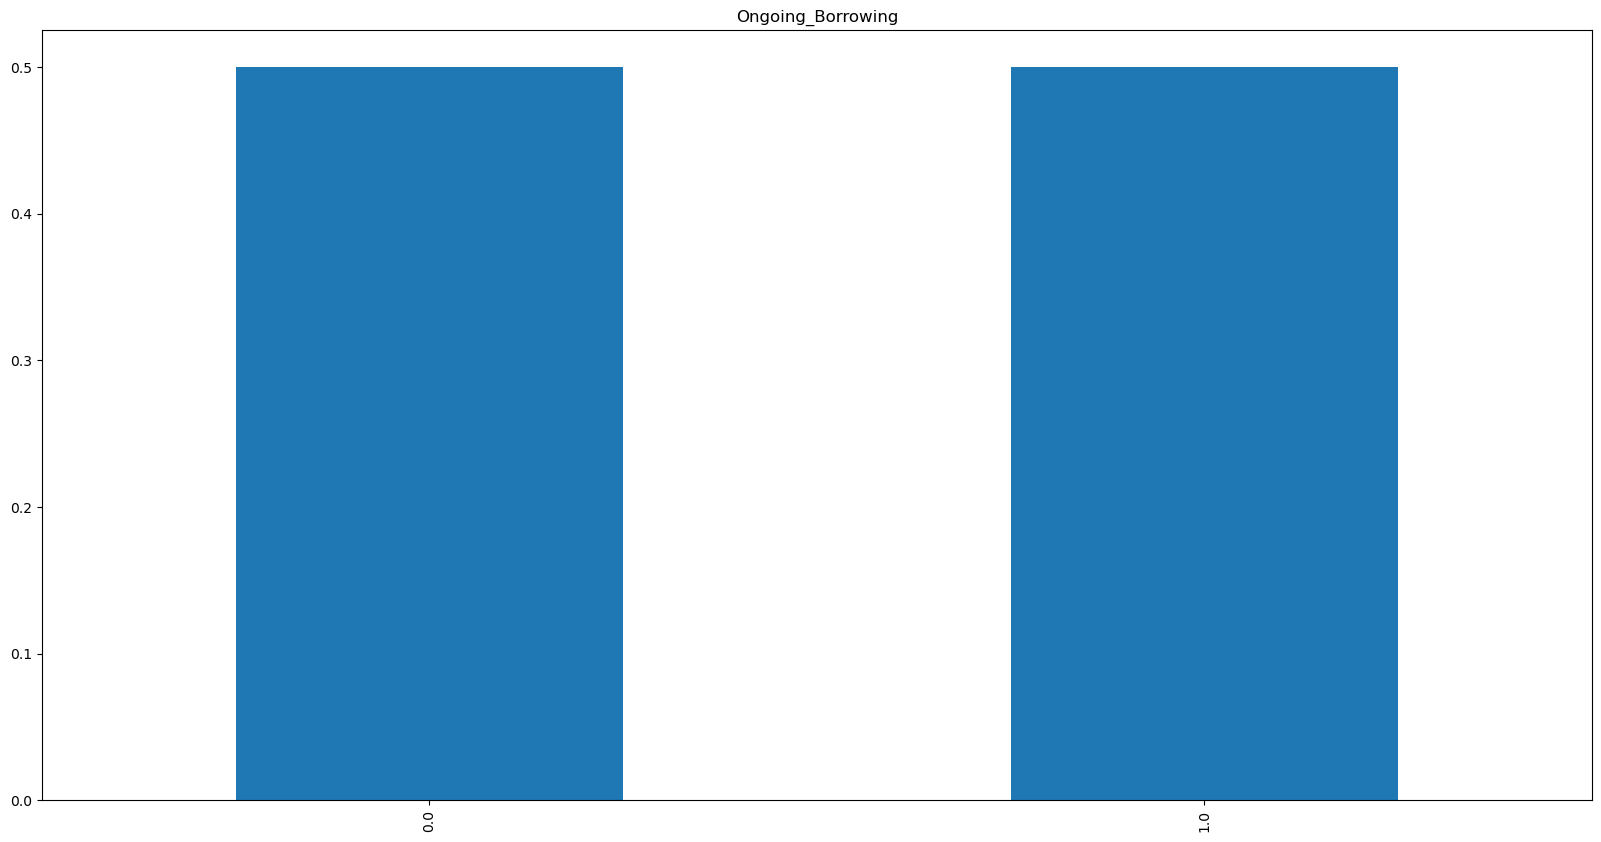

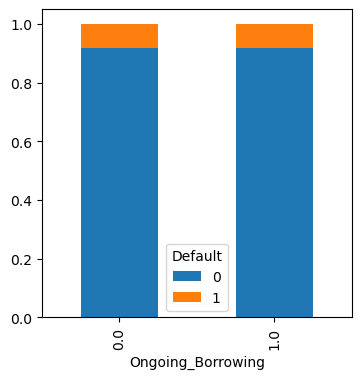

In [2558]:
plot_feature("Ongoing_Borrowing", True)

In [2559]:
# removing the null rows
df.dropna(subset=['Ongoing_Borrowing'], inplace=True)

The data is almost equally distributed and the correlation is quite less with default status

##### Residence_Proprietorship 

In [2560]:
corr_def("Residence_Proprietorship")

Negative correlation of -0.0020816144875864177 with the default status


In [2561]:
df["Residence_Proprietorship"].value_counts()

1.0    76191
0.0    33932
Name: Residence_Proprietorship, dtype: int64

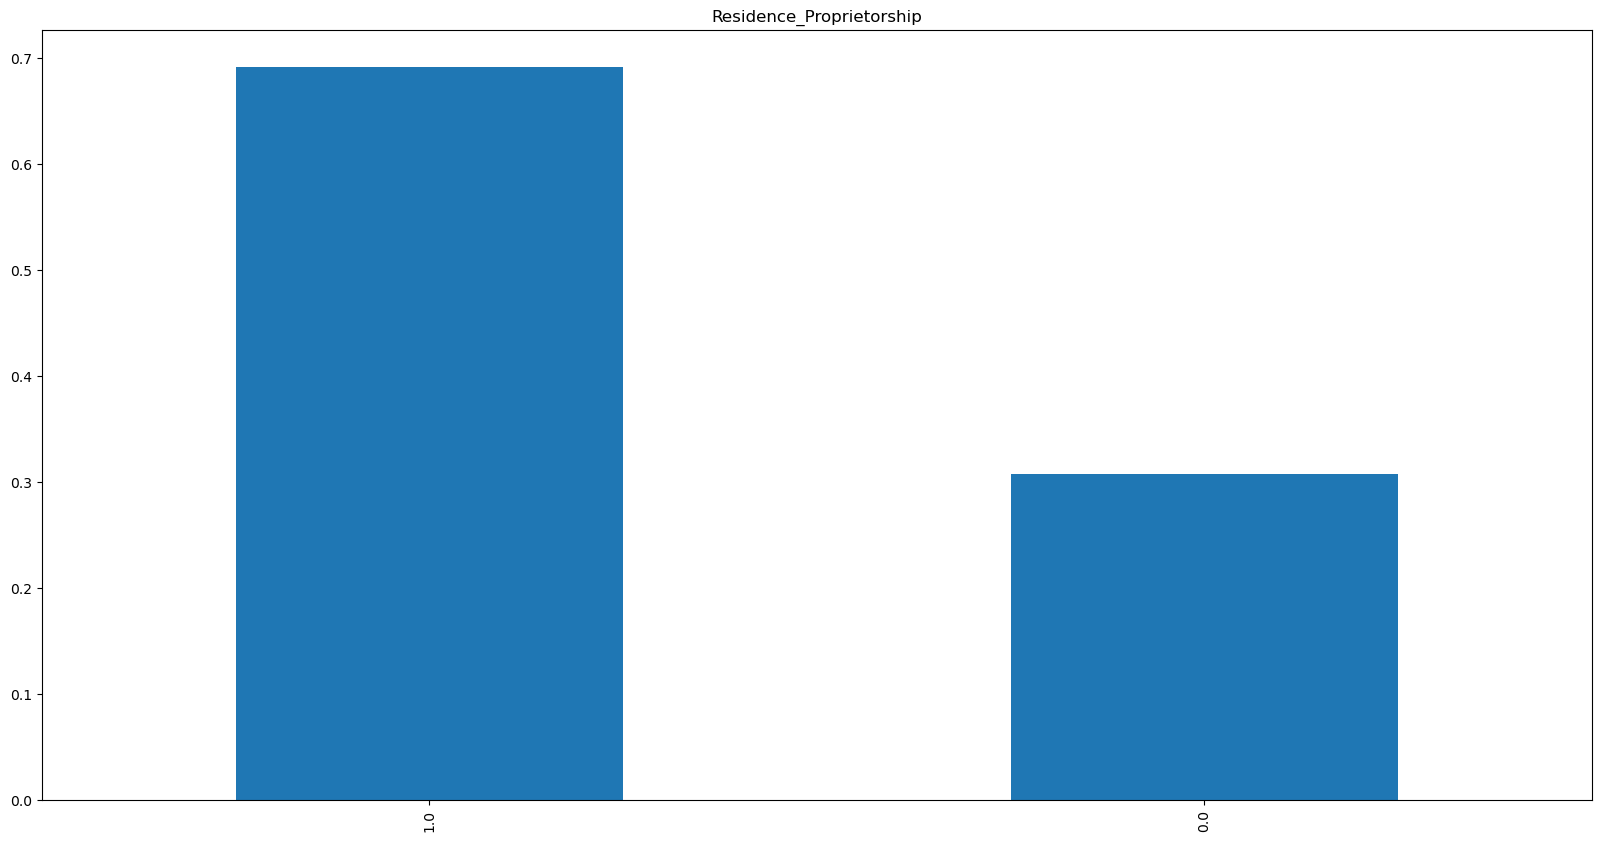

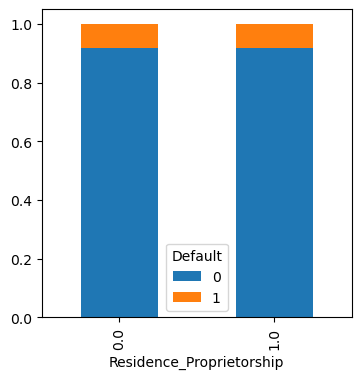

In [2562]:
plot_feature("Residence_Proprietorship", True)

In [2563]:
# removing the null rows
df.dropna(subset=['Residence_Proprietorship'], inplace=True)

##### Offspring_Number

In [2564]:
df["Offspring_Number"].describe()

count    106811.000000
mean          0.415893
std           0.727882
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: Offspring_Number, dtype: float64

In [2565]:
# Handling outliers

y_axis_range = (0, 100000)

# Filter the data to include only salary values within the defined range
filtered_data = df[(df['Offspring_Number'] >= y_axis_range[0]) & (df['Offspring_Number'] <= y_axis_range[1])]

# Identify and remove outliers using a custom IQR multiplier (e.g., 3.0)
Q1 = filtered_data['Offspring_Number'].quantile(0.25)
Q3 = filtered_data['Offspring_Number'].quantile(0.75)
IQR_multiplier = 3.0  # Customize the multiplier
lower_bound = Q1 - IQR_multiplier * (Q3 - Q1)
upper_bound = Q3 + IQR_multiplier * (Q3 - Q1)

filtered_data = filtered_data[(filtered_data['Offspring_Number'] >= lower_bound) & (filtered_data['Offspring_Number'] <= upper_bound)]
df = filtered_data
df["Offspring_Number"].describe()

count    106755.000000
mean          0.412571
std           0.710013
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           4.000000
Name: Offspring_Number, dtype: float64

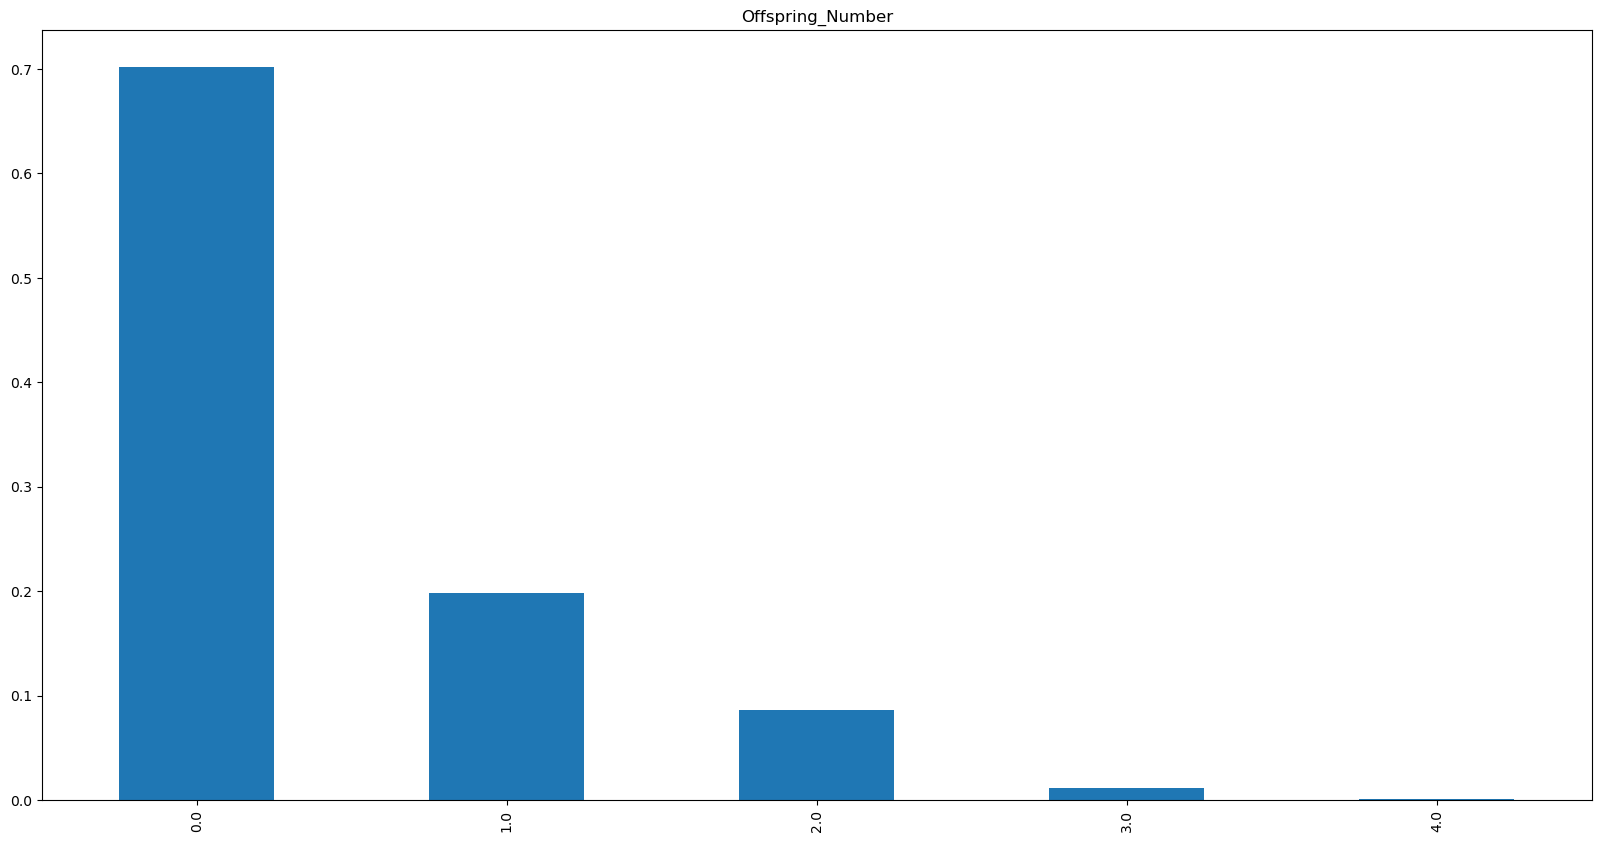

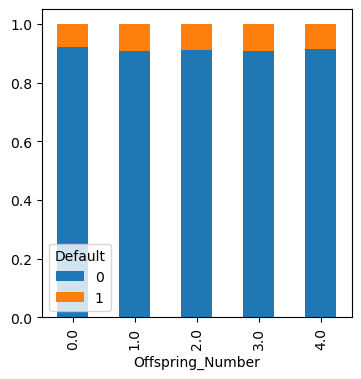

In [2566]:
plot_feature("Offspring_Number", True)

In [2567]:
# Impute median

median_impute("Offspring_Number")

'Imputed by median of the feature, the null values remaining are 0'

##### Loan_Capital

In [2568]:
corr_def('Loan_Capital')

Negative correlation of -0.02882012118280436 with the default status


In [2569]:
df["Loan_Capital"].describe()

count    103579.000000
mean      59527.399123
std       39757.725321
min        4500.000000
25%       27000.000000
50%       50992.200000
75%       80865.000000
max      403103.250000
Name: Loan_Capital, dtype: float64

In [2570]:
# Handling outliers

y_axis_range = (0, 100000)

# Filter the data to include only salary values within the defined range
filtered_data = df[(df['Loan_Capital'] >= y_axis_range[0]) & (df['Loan_Capital'] <= y_axis_range[1])]

# Identify and remove outliers using a custom IQR multiplier (e.g., 3.0)
Q1 = filtered_data['Loan_Capital'].quantile(0.25)
Q3 = filtered_data['Loan_Capital'].quantile(0.75)
IQR_multiplier = 3.0  # Customize the multiplier
lower_bound = Q1 - IQR_multiplier * (Q3 - Q1)
upper_bound = Q3 + IQR_multiplier * (Q3 - Q1)

filtered_data = filtered_data[(filtered_data['Loan_Capital'] >= lower_bound) & (filtered_data['Loan_Capital'] <= upper_bound)]
df = filtered_data
df["Loan_Capital"].describe()

count    86903.000000
mean     45927.690636
std      23981.371285
min       4500.000000
25%      25470.000000
50%      45000.000000
75%      65181.600000
max      99988.650000
Name: Loan_Capital, dtype: float64

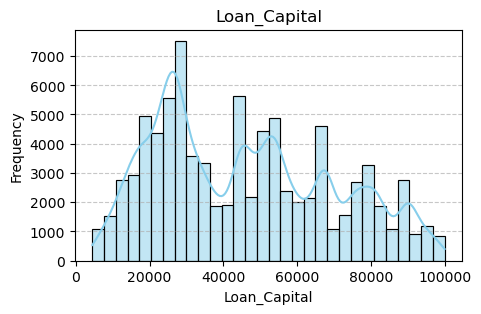

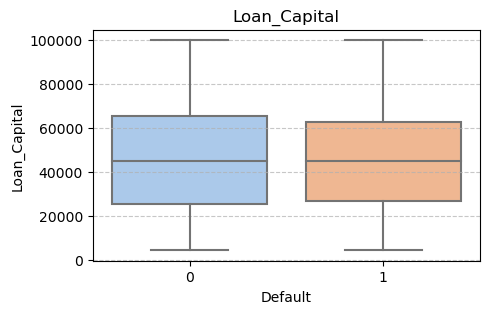

In [2571]:
plot_feature('Loan_Capital', False)

It looks like all loans are not unique. The certain amount appears several times. It may be the reason; the company has some range or a certain amount to lend.

##### Borrowing_Periodic_Payment

In [2572]:
df["Borrowing_Periodic_Payment"].describe()

count    83450.000000
mean      2352.080286
std       1148.428441
min        217.350000
25%       1511.100000
50%       2225.250000
75%       2926.800000
max      10409.400000
Name: Borrowing_Periodic_Payment, dtype: float64

In [2573]:
# Handling outliers

y_axis_range = (0, 100000)

# Filter the data to include only salary values within the defined range
filtered_data = df[(df['Borrowing_Periodic_Payment'] >= y_axis_range[0]) & (df['Borrowing_Periodic_Payment'] <= y_axis_range[1])]

# Identify and remove outliers using a custom IQR multiplier (e.g., 3.0)
Q1 = filtered_data['Borrowing_Periodic_Payment'].quantile(0.25)
Q3 = filtered_data['Borrowing_Periodic_Payment'].quantile(0.75)
IQR_multiplier = 3.0  # Customize the multiplier
lower_bound = Q1 - IQR_multiplier * (Q3 - Q1)
upper_bound = Q3 + IQR_multiplier * (Q3 - Q1)

filtered_data = filtered_data[(filtered_data['Borrowing_Periodic_Payment'] >= lower_bound) & (filtered_data['Borrowing_Periodic_Payment'] <= upper_bound)]
df = filtered_data
df["Borrowing_Periodic_Payment"].describe()

count    83188.000000
mean      2333.337660
std       1099.507116
min        217.350000
25%       1507.950000
50%       2221.200000
75%       2922.412500
max       7164.900000
Name: Borrowing_Periodic_Payment, dtype: float64

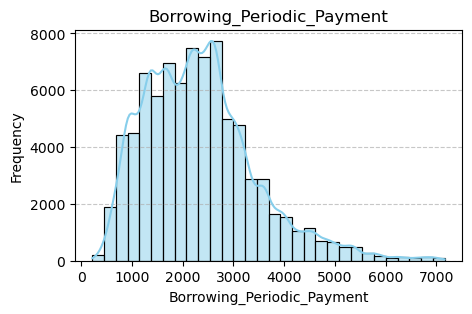

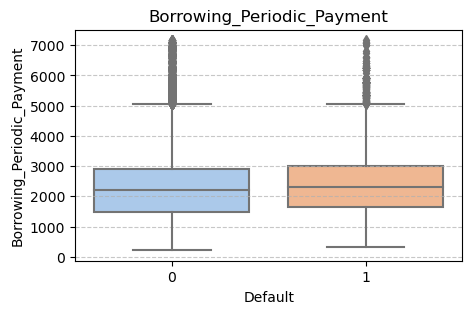

In [2574]:
plot_feature('Borrowing_Periodic_Payment', False)

In [2575]:
#Impute median

median_impute("Borrowing_Periodic_Payment")

'Imputed by median of the feature, the null values remaining are 0'

Most defaults have occurred in the periodic payment range of 1500 to 3000

##### Customer_Revenue_Category


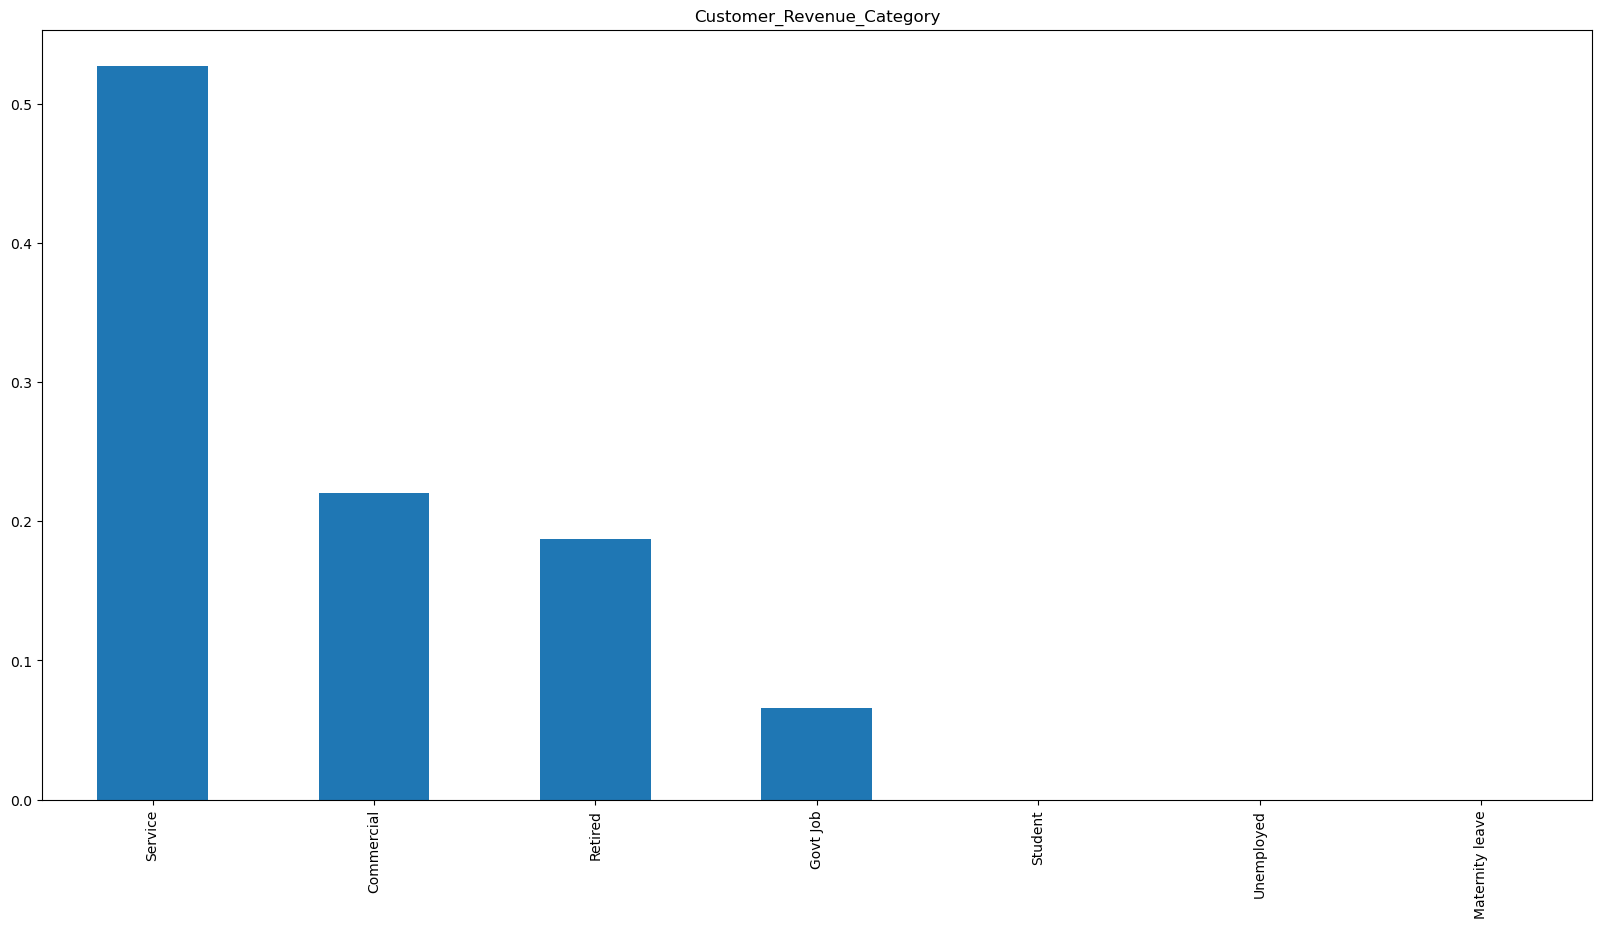

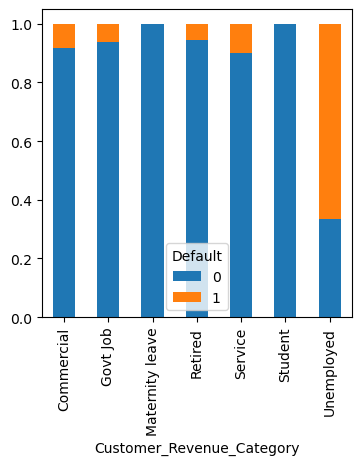

In [2576]:
plot_feature("Customer_Revenue_Category", True)

In [2577]:
# removing the null rows
df.dropna(subset=['Customer_Revenue_Category'], inplace=True)

Customers in higher revenue categories show lower default rates, illustrating the link between income and loan repayment ability.

##### Patron_Academic_Qualification

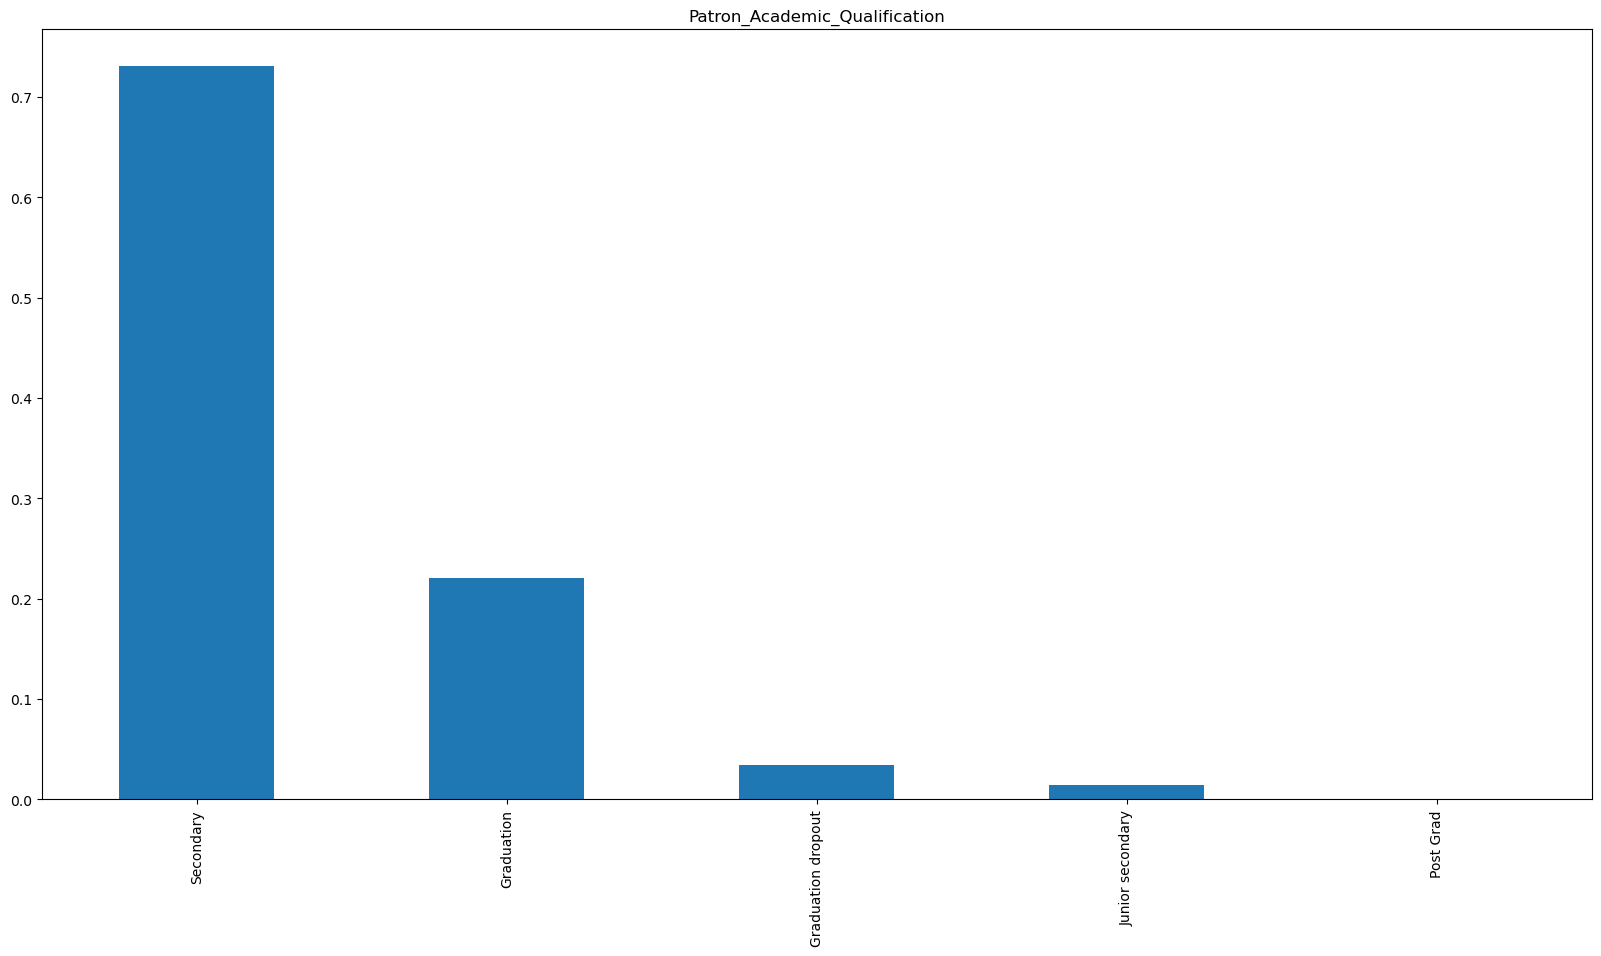

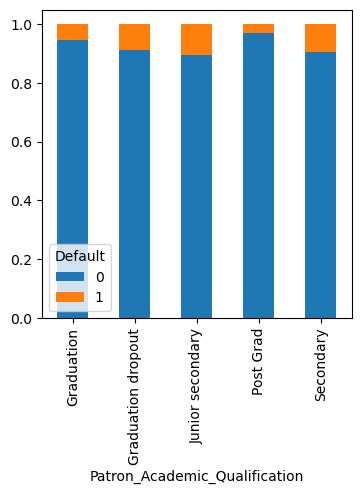

In [2578]:
plot_feature("Patron_Academic_Qualification", True)

In [2579]:
# Imputing mode

mode_impute("Patron_Academic_Qualification")

'Imputed by mode of the feature, the null values remaining are 0'

The maximum defaults are from junior secondary and secondary
The least default from the phd background
Customers with higher academic qualifications have lower default rates, indicating that education may be linked to financial stability.

##### ID

In [2580]:
#We can drop ID

feature_to_be_removed.append("ID")

### 11 -20 features

In [2581]:
df.iloc[:5,11:21]

,Customer_Conjugal_State,Patron_Sex,Borrowing_Agreement_Category,Customer_Living_Arrangement,Population_Fraction_by_Region,Elderliness_in_Days,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Private_Dwelling_Duration
0,M,Male,CL,Home,0.028663,13957,1062.0,6123.0,383.0,NaN
2,W,Male,CL,Family,0.0228,16790,5102.0,NaN,331.0,NaN
3,M,Male,CL,Home,0.010556,23195,365243.0,NaN,775.0,NaN
5,W,Female,CL,Home,0.019101,13881,1184.0,3910.0,3910.0,NaN
7,M,Male,CL,Home,0.009175,22493,365243.0,12617.0,5280.0,NaN


##### Borrowing_Agreement_Category

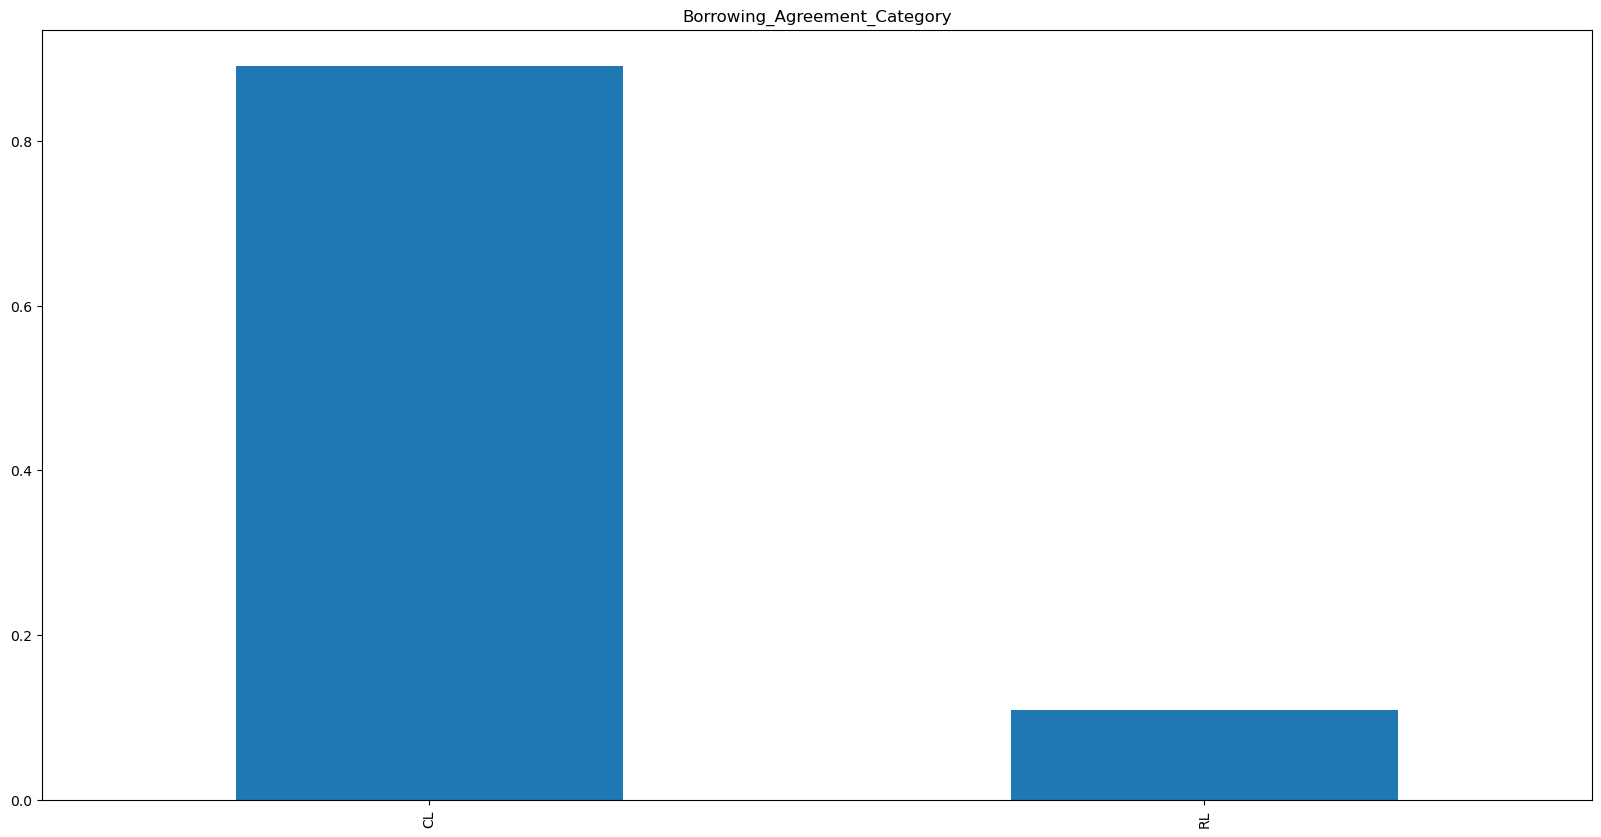

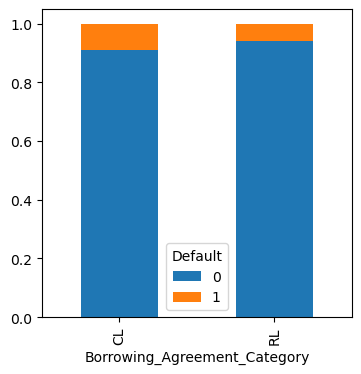

In [2582]:
plot_feature("Borrowing_Agreement_Category", True)

CL category is more sold than the RL

In [2583]:
mode_impute("Borrowing_Agreement_Category")

'Imputed by mode of the feature, the null values remaining are 0'

The percent defaulters in CL and RL are somewhat similar but the count of defaulters is more in CL.

##### Customer_Conjugal_State

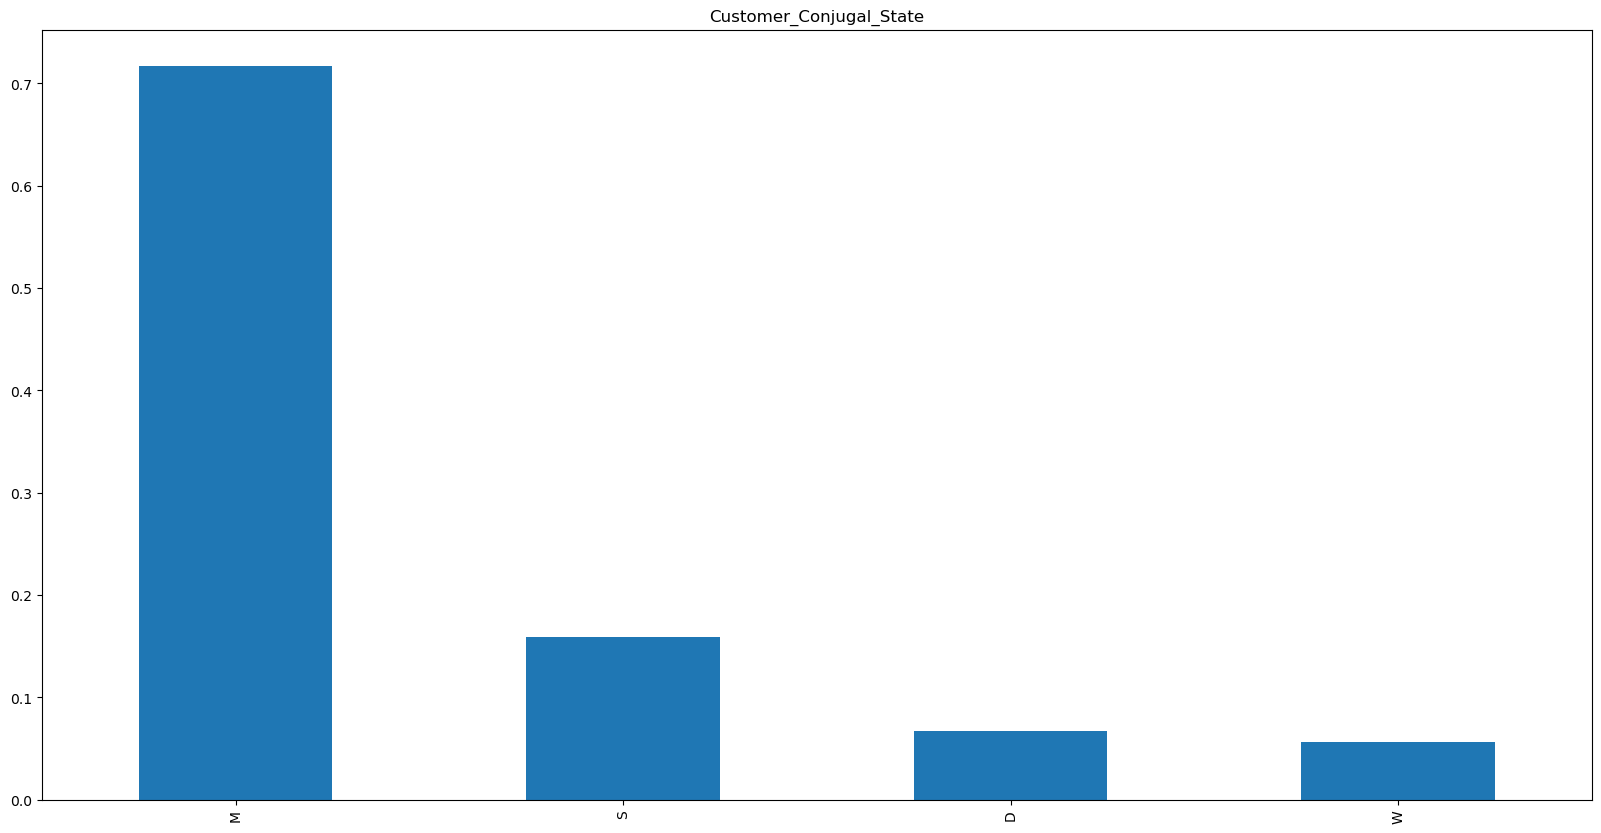

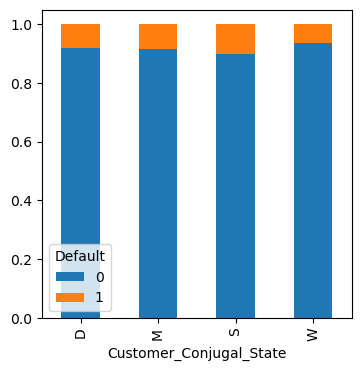

In [2584]:
plot_feature("Customer_Conjugal_State", True)

In [2585]:
# Imputing mode

mode_impute("Customer_Conjugal_State")

'Imputed by mode of the feature, the null values remaining are 0'

Single customers exhibit a higher default rate compared to married or partnered customers, suggesting that marital status may affect financial stability.

##### Patron_Sex

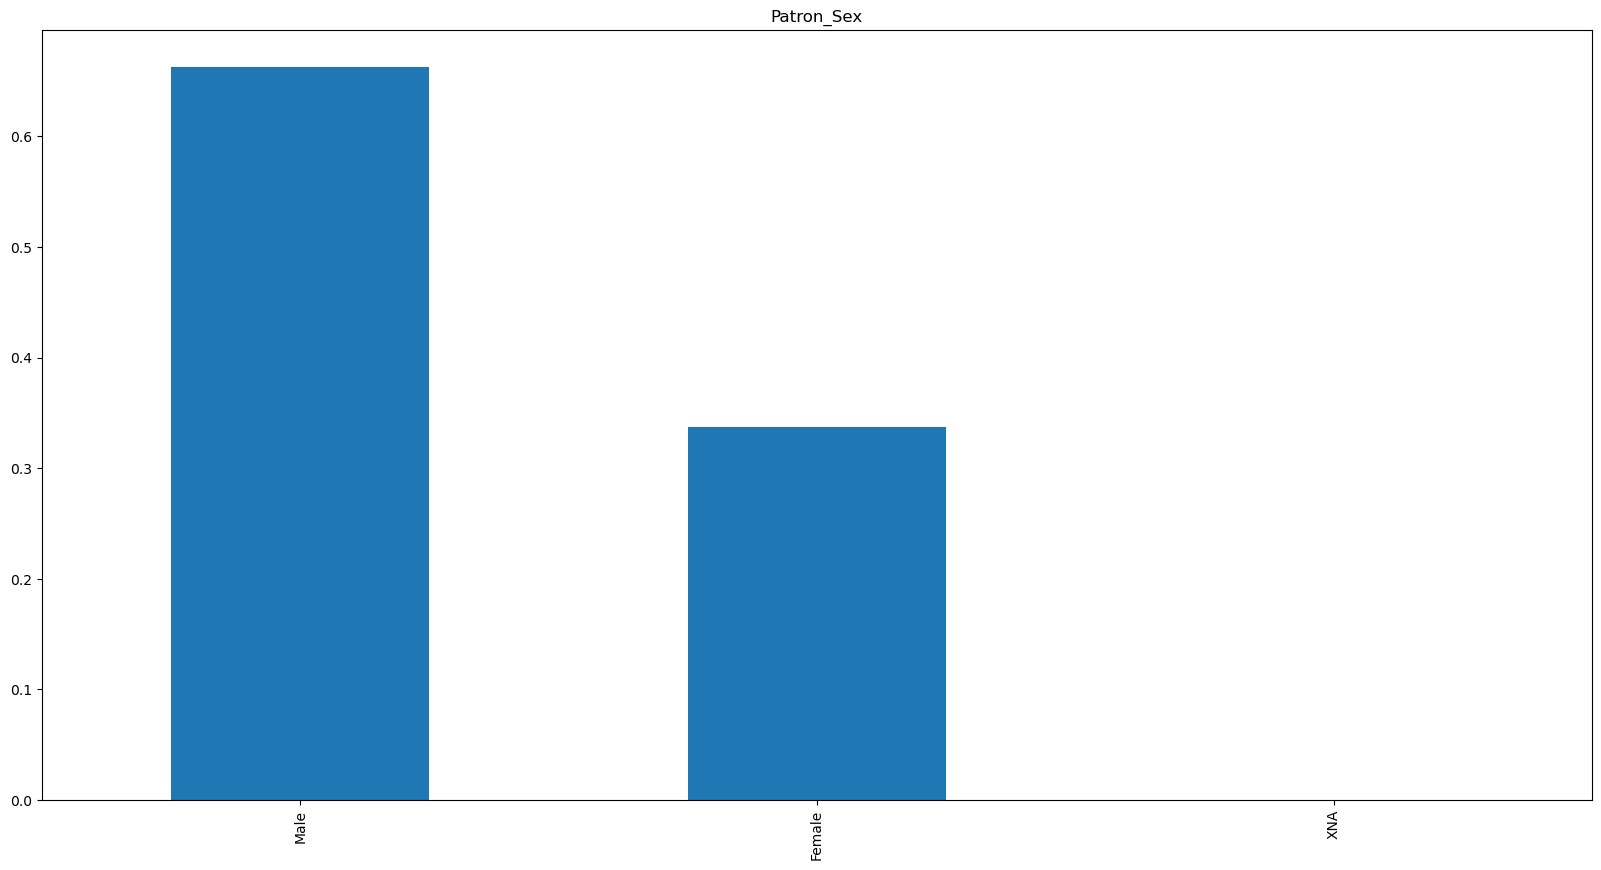

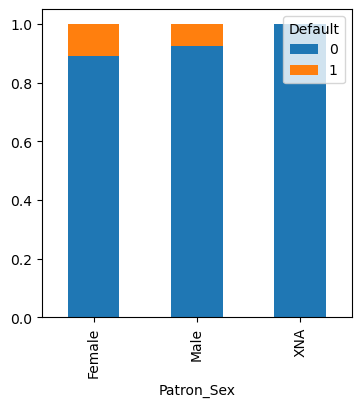

In [2586]:
plot_feature("Patron_Sex", True)

In [2587]:
#Imputing mode

mode_impute("Patron_Sex")

'Imputed by mode of the feature, the null values remaining are 0'

Females have slight higher percentage of defaults. A possible reason could be since women have concession in securing bank loans in most places in a bid to make them independent, so many accounts are being opened in their names without actual active involvement. This leads to defaults.

##### Customer_Living_Arrangement

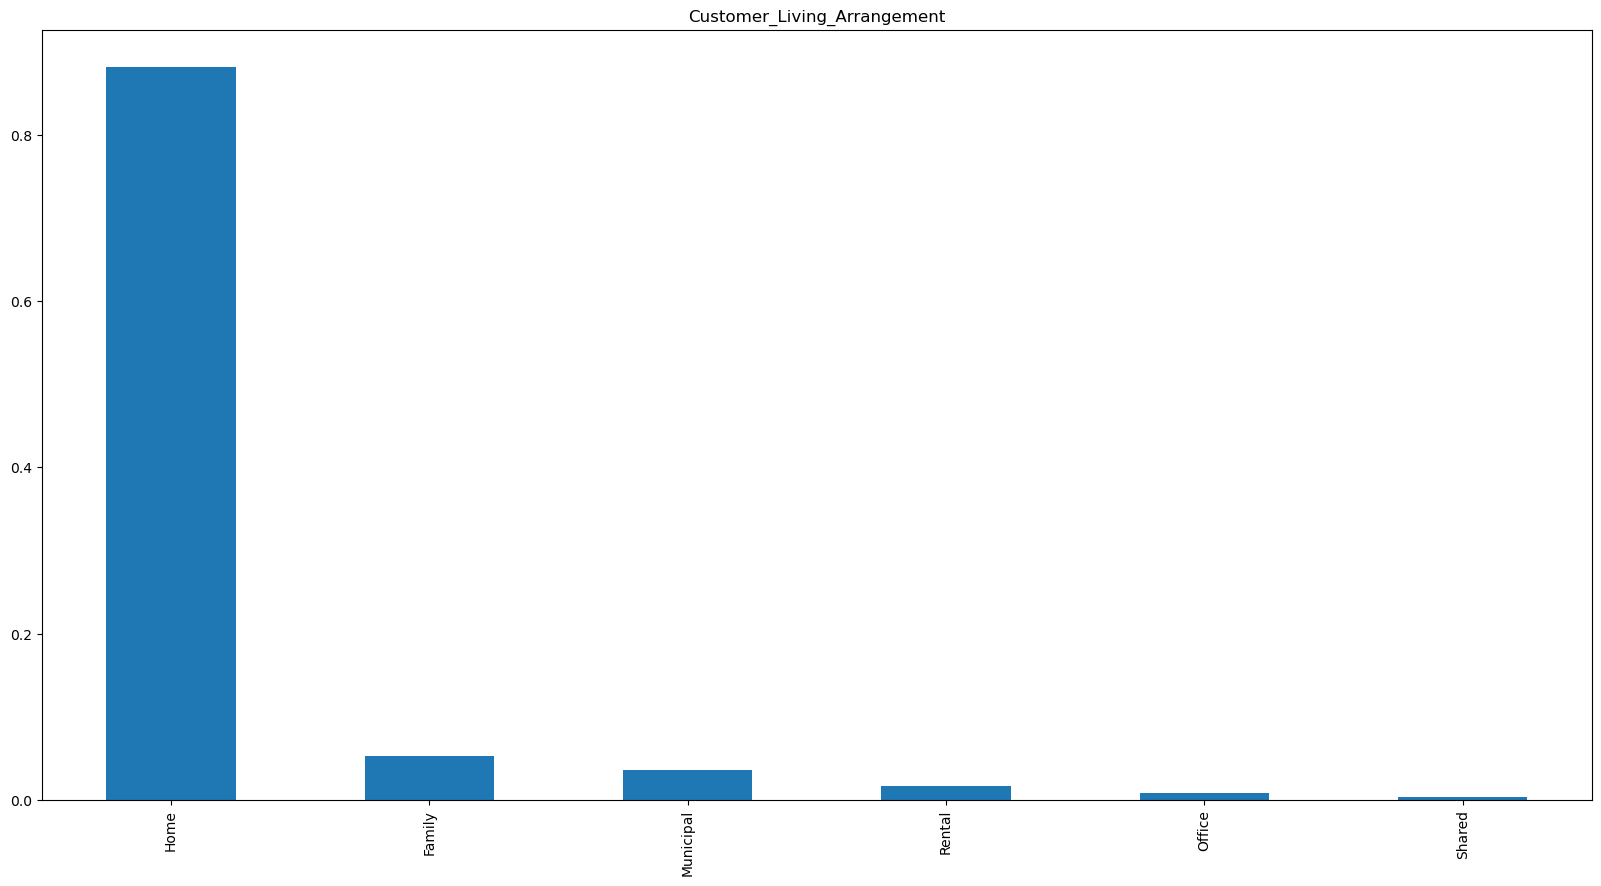

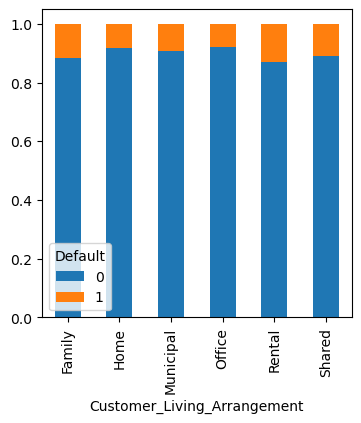

In [2588]:
plot_feature("Customer_Living_Arrangement", True)

In [2589]:
mode_impute("Customer_Living_Arrangement")

'Imputed by mode of the feature, the null values remaining are 0'

The rental customers have a higher percentage default record. Financial instability.
Most live in homes.

##### Population_Fraction_by_Region

In [2590]:
df["Population_Fraction_by_Region"].describe()

count     77454.000000
unique       83.000000
top           0.035792
freq       4133.000000
Name: Population_Fraction_by_Region, dtype: float64

In [2591]:
df['Population_Fraction_by_Region'].isna().sum()

3195

In [2592]:

df['Population_Fraction_by_Region'] = pd.to_numeric(df['Population_Fraction_by_Region'], errors='coerce')

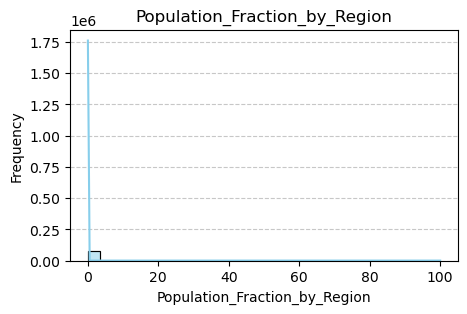

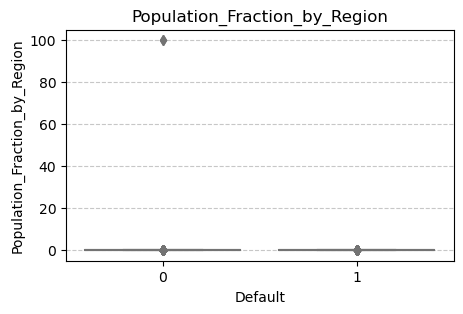

In [2593]:
plot_feature('Population_Fraction_by_Region', False)

In [2594]:
#dropping this feature
feature_to_be_removed.append('Population_Fraction_by_Region')

##### Elderliness_in_Days

In [2595]:
df["Elderliness_in_Days"].info()

<class 'pandas.core.series.Series'>
Int64Index: 80649 entries, 0 to 121855
Series name: Elderliness_in_Days
Non-Null Count  Dtype 
--------------  ----- 
78270 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [2596]:
# Changing the dtype to numeric
df["Elderliness_in_Days"]= pd.to_numeric(df["Elderliness_in_Days"], errors='coerce')


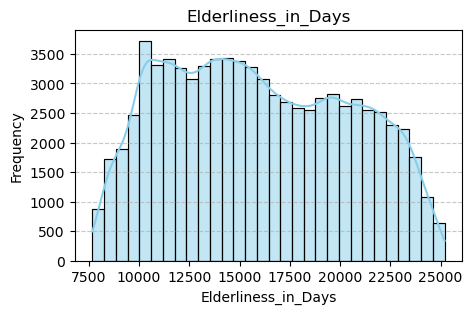

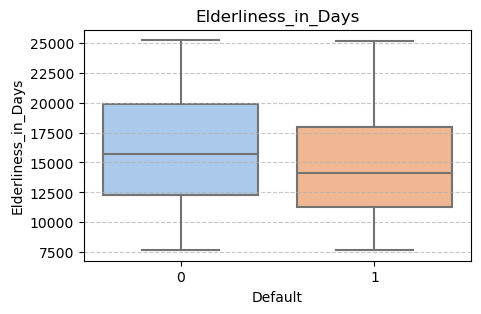

In [2597]:
plot_feature("Elderliness_in_Days", False)

In [2598]:
df["Elderliness_in_Days"].isnull().sum()

2390

In [2599]:
# Imputing median

median_impute("Elderliness_in_Days")

'Imputed by median of the feature, the null values remaining are 0'

##### Work_Duration_in_Days

In [2600]:
df["Work_Duration_in_Days"].value_counts()

365243.0    14628
216.0          47
381.0          47
212.0          44
230.0          44
            ...  
6259.0          1
6933.0          1
5379.0          1
5036.0          1
11796.0         1
Name: Work_Duration_in_Days, Length: 8770, dtype: int64

In [2601]:
df["Work_Duration_in_Days"].isnull().sum()

2478

In [2602]:
corr_def("Work_Duration_in_Days")

Negative correlation of -0.05223360949253523 with the default status


negligible correlation with the default status

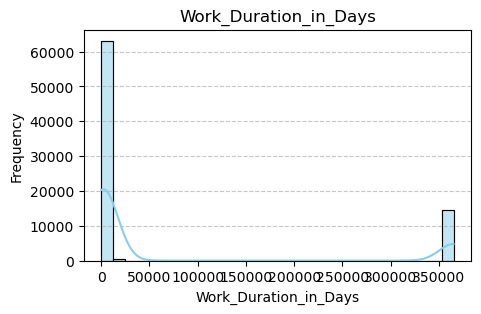

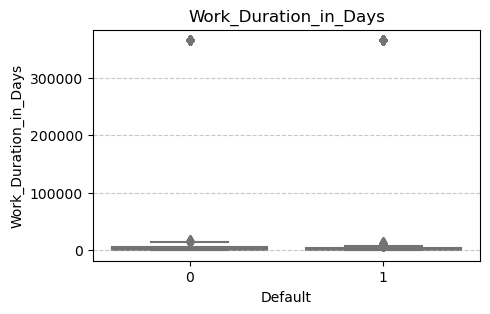

In [2603]:
plot_feature("Work_Duration_in_Days", False)

In [2604]:
mode_impute("Work_Duration_in_Days")

'Imputed by mode of the feature, the null values remaining are 0'

##### Enlistment_Period_in_Days

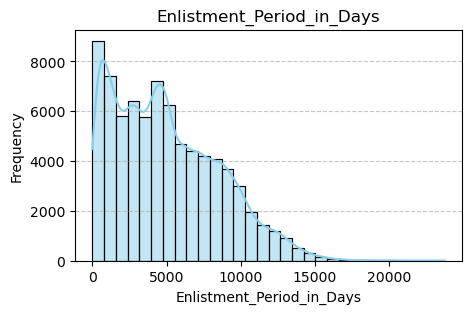

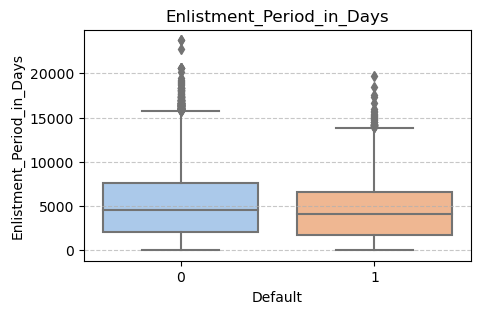

In [2605]:
plot_feature("Enlistment_Period_in_Days", False)

Longer enlistment periods are linked to lower default rates, emphasizing the role of employment stability.

In [2606]:
median_impute("Enlistment_Period_in_Days")

'Imputed by median of the feature, the null values remaining are 0'

##### Identity_Age_in_Days

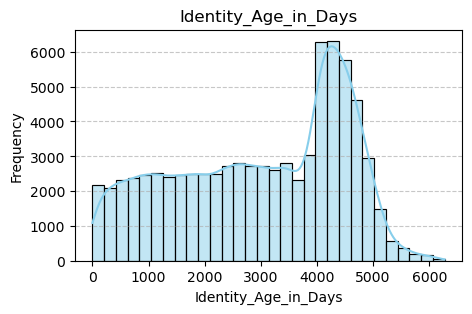

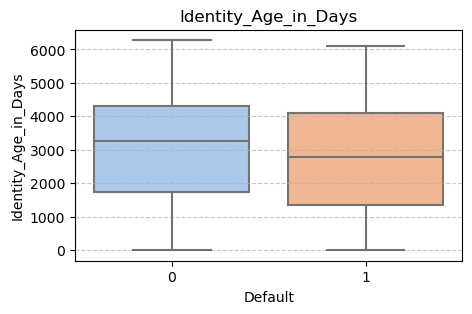

In [2607]:
plot_feature("Identity_Age_in_Days", False)

In [2608]:
median_impute("Identity_Age_in_Days")

'Imputed by median of the feature, the null values remaining are 0'

##### Private_Dwelling_Duration


In [2609]:
corr_def('Private_Dwelling_Duration')


Positive correlation of 0.04260557944174395 with the default status


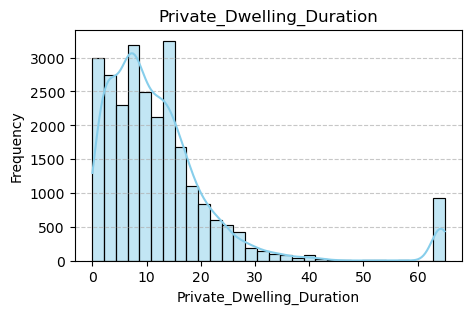

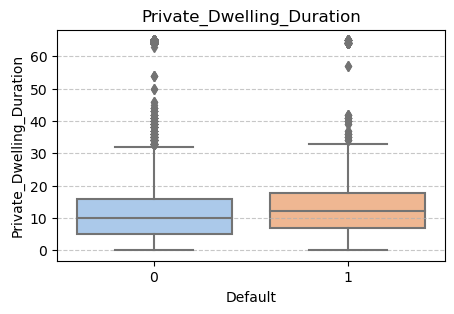

In [2610]:
plot_feature("Private_Dwelling_Duration", False)

In [2611]:
#We can remove this columns as the correlation is small and the null values are high above 60%

In [2612]:
#dropping this feature
feature_to_be_removed.append("Private_Dwelling_Duration")

### 21-30 features

In [2613]:
df.iloc[:5,21:31]

,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,Customer_Vocation,Patron_Kin_Count,Customer_Urban_Area_Ranking,Request_Submission_Day,Request_Submission_Hour,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker
0,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes
2,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes
3,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes
5,1,0,0,Laborers,2.0,2.0,2.0,10.0,Yes,Yes
7,1,0,1,NaN,2.0,2.0,4.0,15.0,Yes,Yes


##### Cellphone_Marker

In [2614]:
corr_def("Cellphone_Marker")

Positive correlation of 0.0010752908793706742 with the default status


In [2615]:
#dropping this feature
feature_to_be_removed.append("Cellphone_Marker")

##### Residential_Phone_Marker


In [2616]:
corr_def("Residential_Phone_Marker")

Positive correlation of 0.02216181450717243 with the default status


In [2617]:
#dropping this feature
feature_to_be_removed.append("Residential_Phone_Marker")

##### Employment_Phone_Operation

In [2618]:
corr_def("Employment_Phone_Operation")

Negative correlation of -0.02261336182798294 with the default status


In [2619]:
#dropping this feature
feature_to_be_removed.append("Employment_Phone_Operation")

##### Customer_Vocation

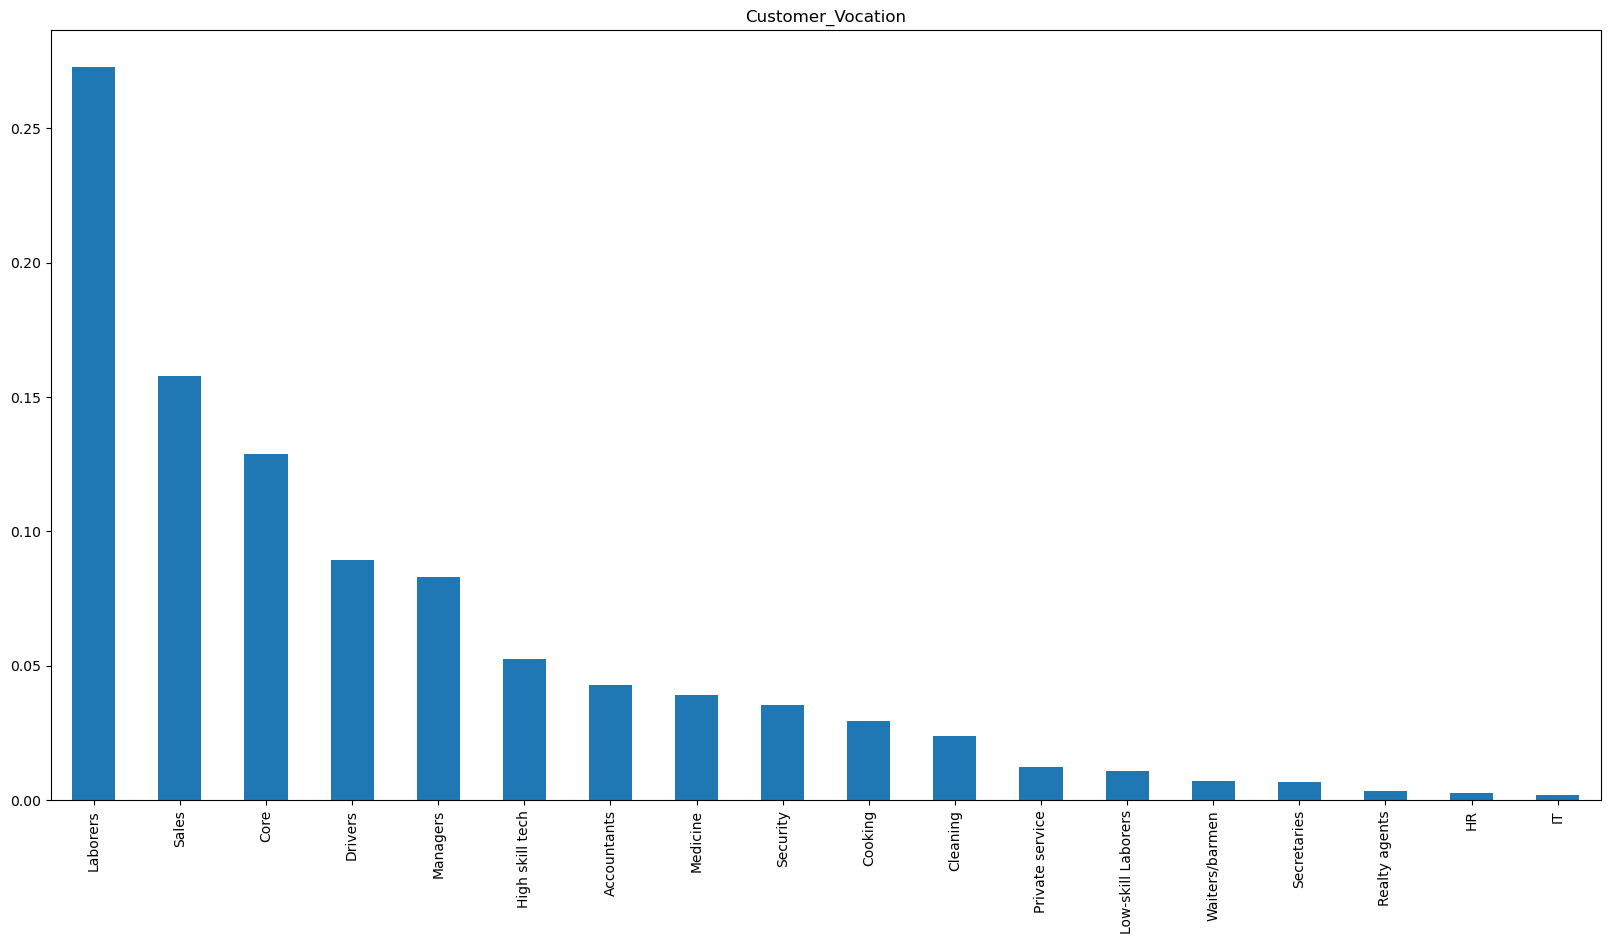

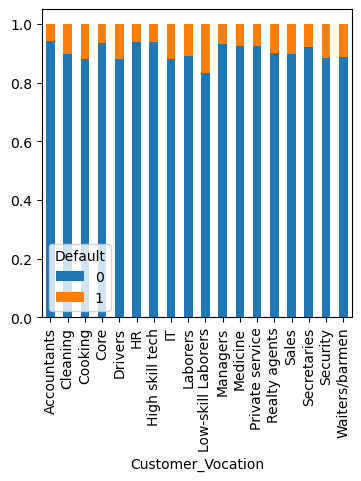

In [2620]:
plot_feature("Customer_Vocation", True)

The data shows and could be impactful in the model to say that labourers and low skill labourers tend to default the highest while the high skill tech and Corporate managers and HR tend to be the least.

In [2621]:
df["Customer_Vocation"].value_counts()

Laborers              14382
Sales                  8320
Core                   6791
Drivers                4708
Managers               4367
High skill tech        2778
Accountants            2254
Medicine               2067
Security               1860
Cooking                1560
Cleaning               1253
Private service         655
Low-skill Laborers      572
Waiters/barmen          368
Secretaries             350
Realty agents           183
HR                      133
IT                      101
Name: Customer_Vocation, dtype: int64

In [2622]:
mode_impute("Customer_Vocation")

'Imputed by mode of the feature, the null values remaining are 0'

##### Patron_Kin_Count

In [2623]:
df["Patron_Kin_Count"].describe()

count    79065.000000
mean         2.128300
std          0.909553
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Patron_Kin_Count, dtype: float64

In [2624]:
# Handling outliers

y_axis_range = (0, 100000)

# Filter the data to include only salary values within the defined range
filtered_data = df[(df['Patron_Kin_Count'] >= y_axis_range[0]) & (df['Patron_Kin_Count'] <= y_axis_range[1])]

# Identify and remove outliers using a custom IQR multiplier (e.g., 3.0)
Q1 = filtered_data['Patron_Kin_Count'].quantile(0.25)
Q3 = filtered_data['Patron_Kin_Count'].quantile(0.75)
IQR_multiplier = 3.0  # Customize the multiplier
lower_bound = Q1 - IQR_multiplier * (Q3 - Q1)
upper_bound = Q3 + IQR_multiplier * (Q3 - Q1)

filtered_data = filtered_data[(filtered_data['Patron_Kin_Count'] >= lower_bound) & (filtered_data['Patron_Kin_Count'] <= upper_bound)]
df = filtered_data
df["Patron_Kin_Count"].describe()

count    79065.000000
mean         2.128300
std          0.909553
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Patron_Kin_Count, dtype: float64

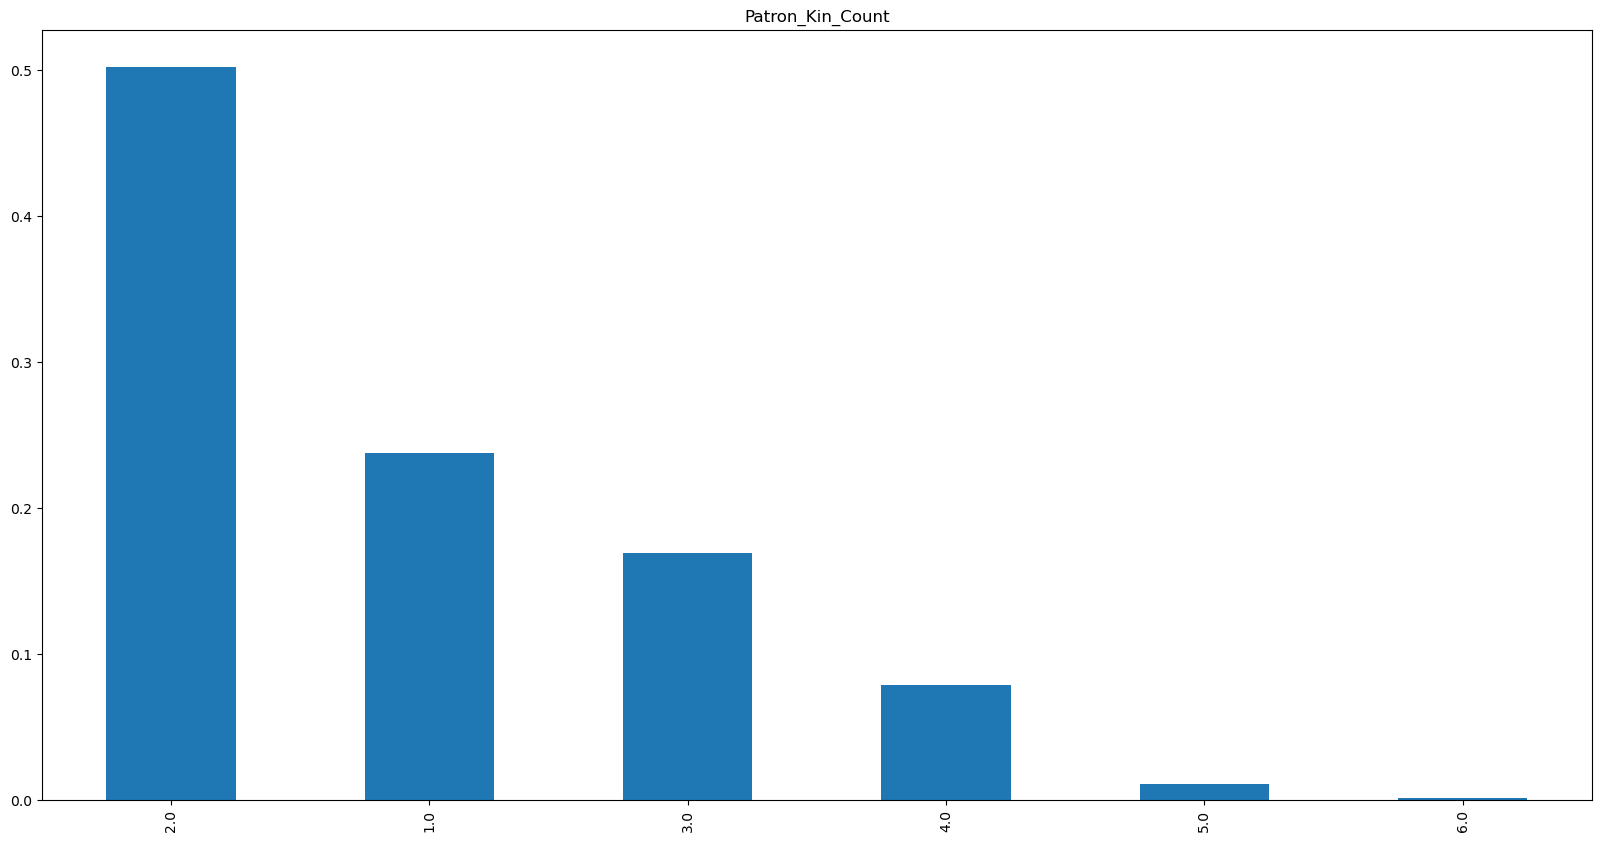

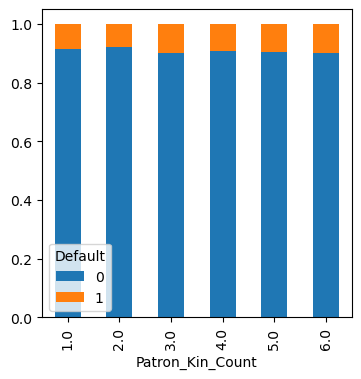

In [2625]:
plot_feature("Patron_Kin_Count", True)

In [2626]:
#Impute median

median_impute("Patron_Kin_Count")

'Imputed by median of the feature, the null values remaining are 0'

##### Request_Submission_Day

In [2627]:
corr_def("Request_Submission_Day")

Positive correlation of 0.0017546265567623454 with the default status


In [2628]:
#dropping this feature
feature_to_be_removed.append("Request_Submission_Day")

##### Request_Submission_Hour

In [2629]:
corr_def("Request_Submission_Hour")

Negative correlation of -0.020581627412627323 with the default status


In [2630]:
#dropping this feature
feature_to_be_removed.append("Request_Submission_Hour")

##### Customer_Urban_Area_Ranking

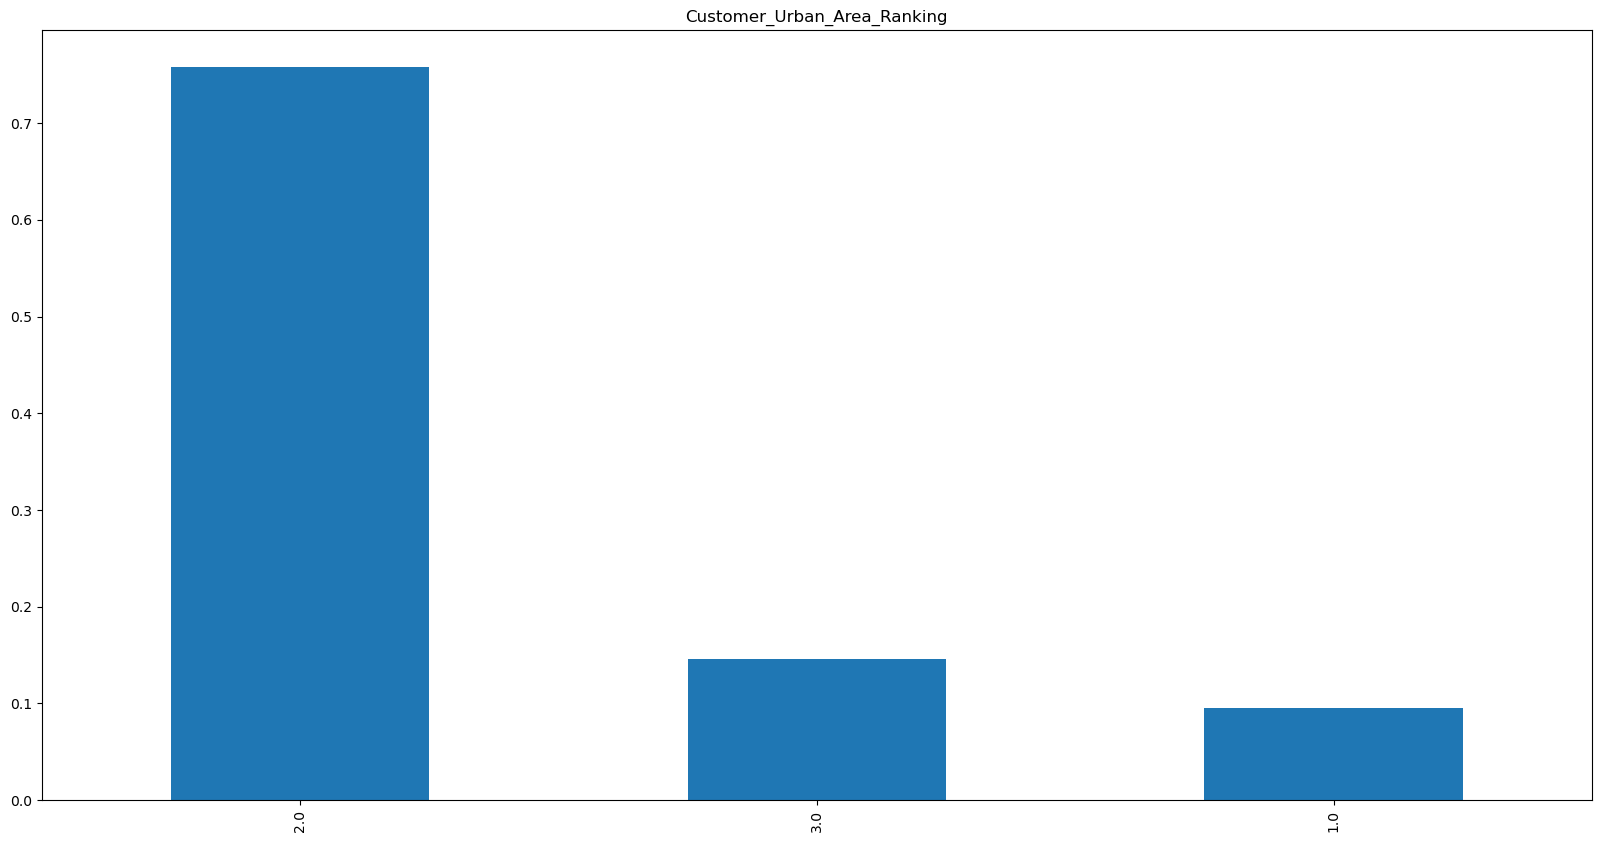

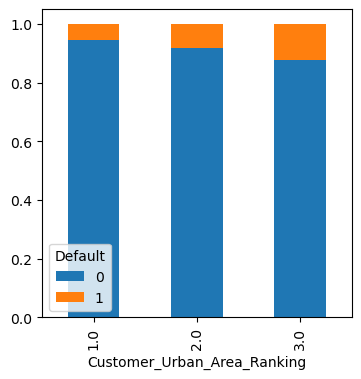

In [2631]:
plot_feature("Customer_Urban_Area_Ranking", True)

In [2632]:
df["Customer_Urban_Area_Ranking"].isnull().sum()

1595

In [2633]:
mode_impute("Customer_Urban_Area_Ranking")

'Imputed by mode of the feature, the null values remaining are 0'

Different urban area rankings exhibit varying default rates

##### Patron_Constant_Correspondence_Marker

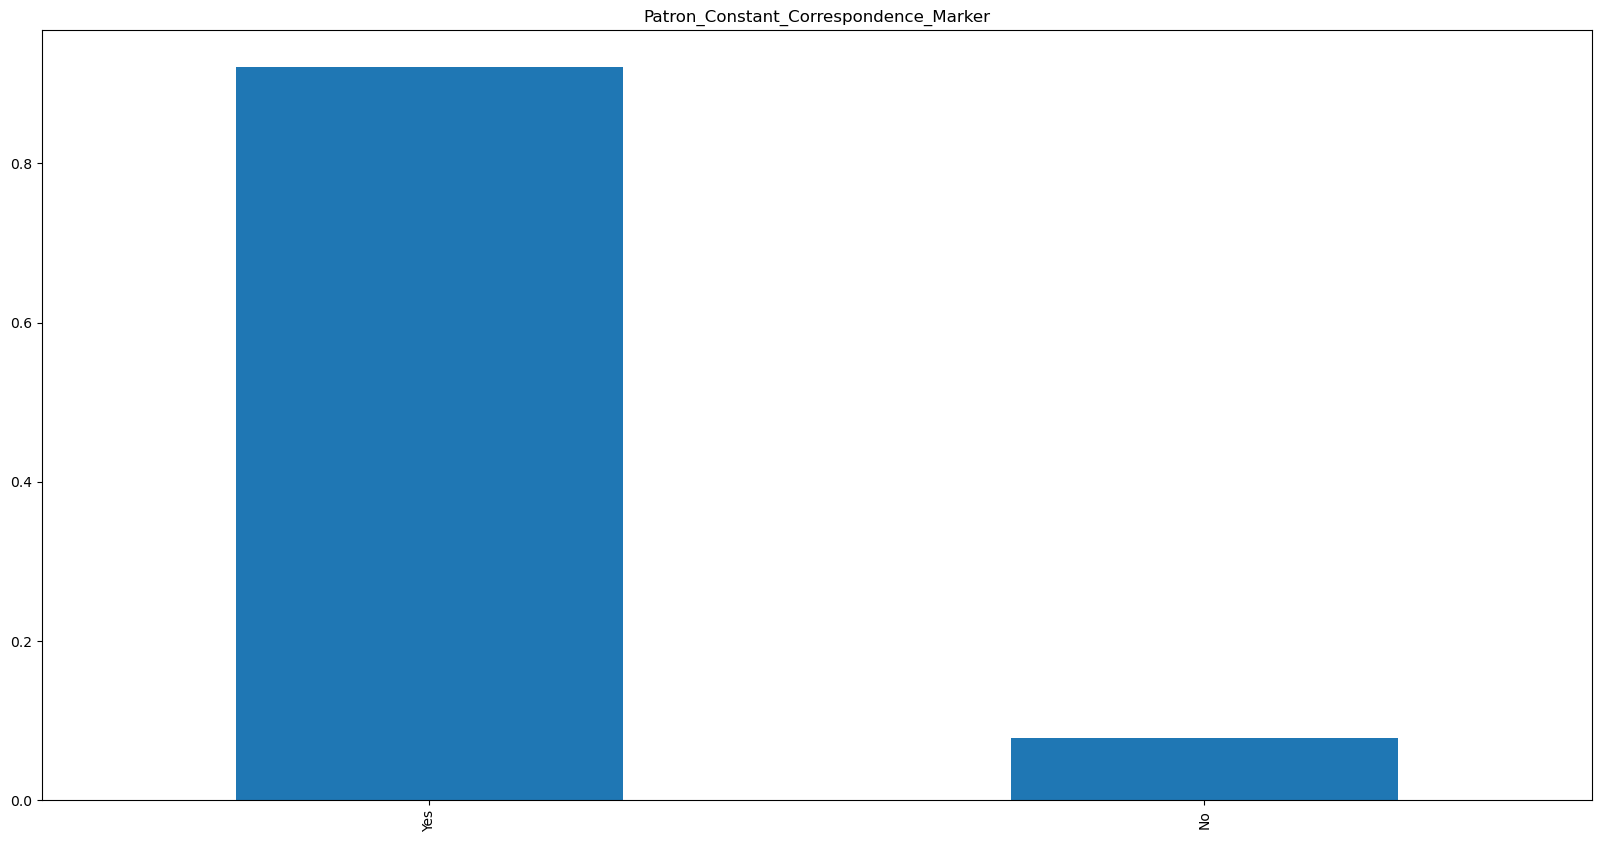

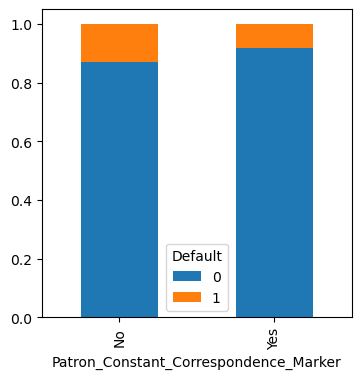

In [2634]:
plot_feature("Patron_Constant_Correspondence_Marker", True)

In [2635]:
df["Patron_Constant_Correspondence_Marker"].value_counts(normalize=True)

Yes    0.921381
No     0.078619
Name: Patron_Constant_Correspondence_Marker, dtype: float64

In [2636]:
df["Patron_Constant_Correspondence_Marker"].describe()

count     79065
unique        2
top         Yes
freq      72849
Name: Patron_Constant_Correspondence_Marker, dtype: object

In [2637]:
df["Patron_Constant_Correspondence_Marker"].info()

<class 'pandas.core.series.Series'>
Int64Index: 79065 entries, 0 to 121855
Series name: Patron_Constant_Correspondence_Marker
Non-Null Count  Dtype 
--------------  ----- 
79065 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [2638]:
# Dropping this feature as this won't add much to the model
feature_to_be_removed.append("Patron_Constant_Correspondence_Marker")

##### Customer_Professional_Communication_Marker

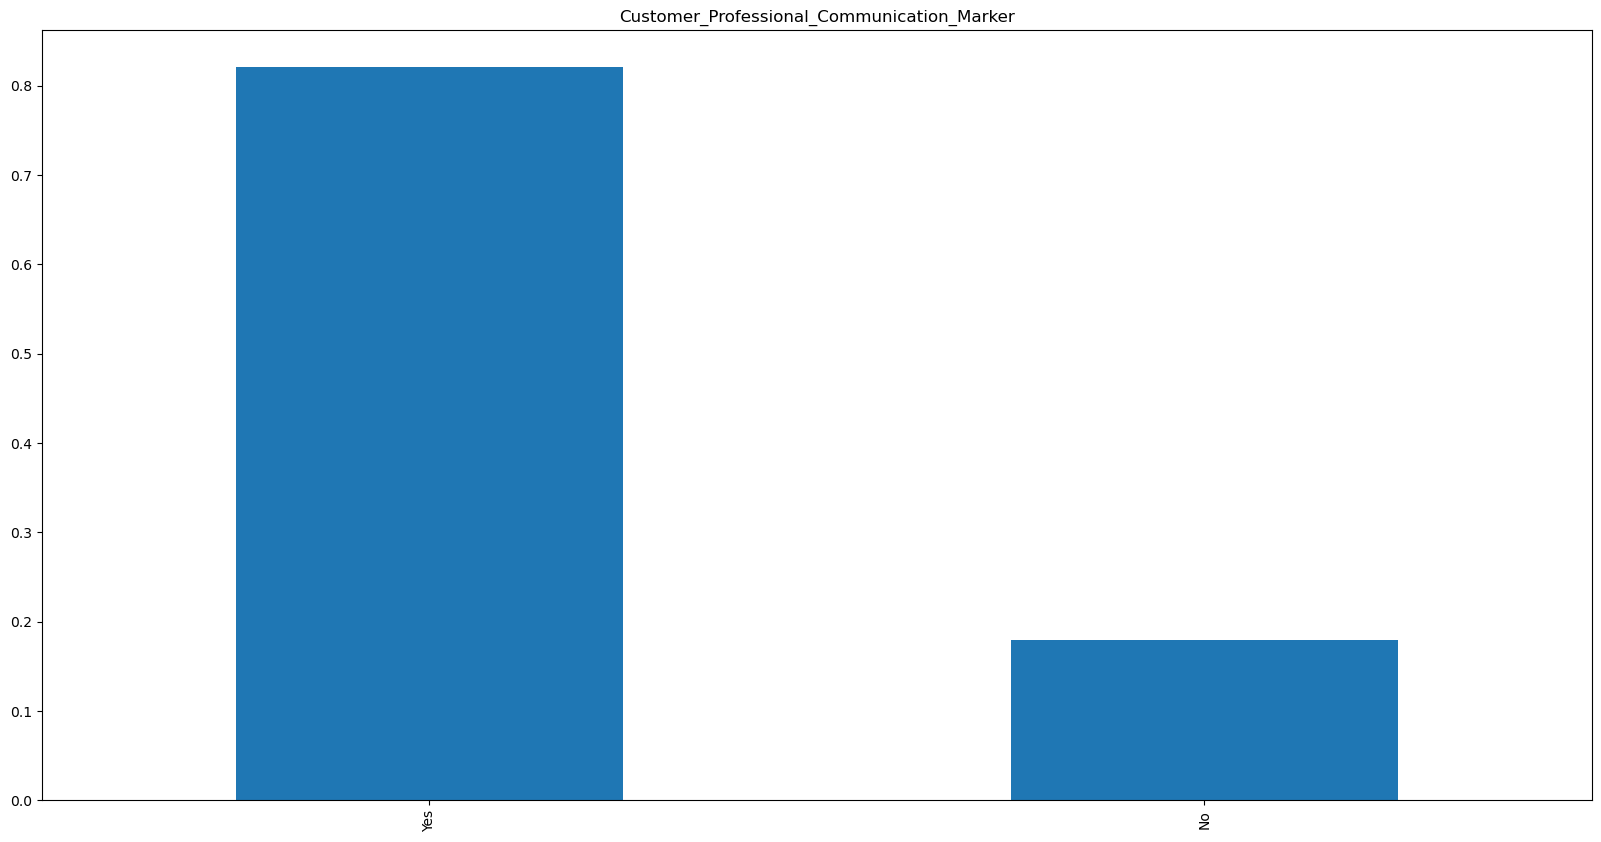

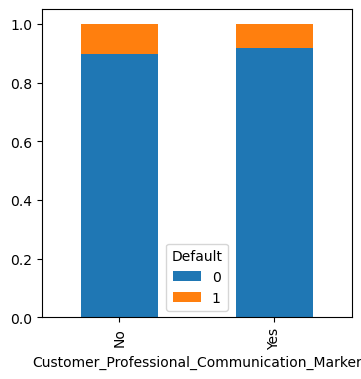

In [2639]:
plot_feature("Customer_Professional_Communication_Marker", True)

In [2640]:
df["Customer_Professional_Communication_Marker"].value_counts(normalize=True)

Yes    0.821084
No     0.178916
Name: Customer_Professional_Communication_Marker, dtype: float64

In [2641]:
# Dropping this feature as this won't add much to the model
feature_to_be_removed.append("Customer_Professional_Communication_Marker")

### 31 - rest of the features

In [2642]:
df.iloc[:5,31:]

,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
0,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
2,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
5,Other,NaN,0.697928,0.420611,0.0639,739.0,0.0,0
7,XNA,0.711468,0.657508,0.549597,NaN,1687.0,4.0,0


##### Sort_of_Institution

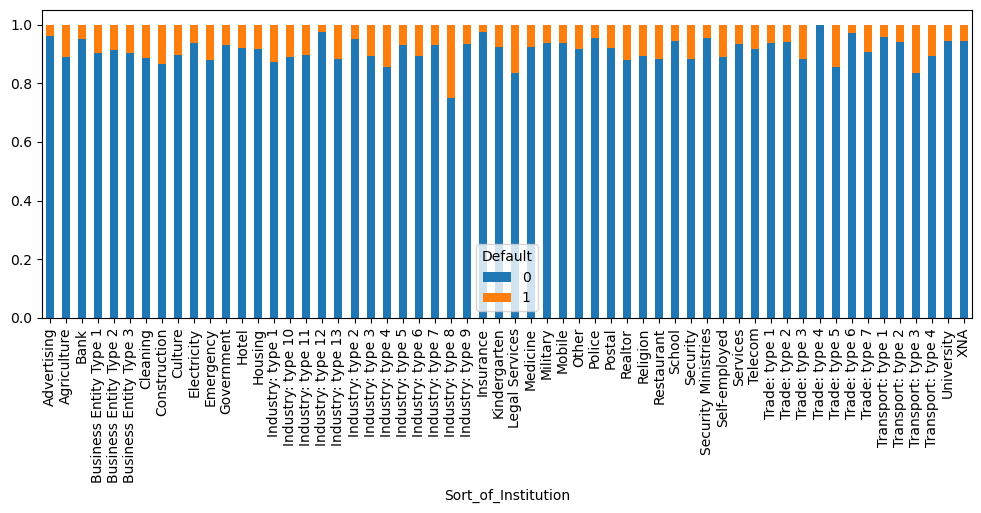

In [2643]:
#Categorical Independent Variable vs Target Variable
col_name=pd.crosstab(df["Sort_of_Institution"],df["Default"])
col_name.div(col_name.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(12,4))
plt.show()

Industry type 8 and trade type 5 have shown the most percentage defaults. This data can impact the model and be included in the model building.

In [2644]:
df["Sort_of_Institution"].value_counts()

Business Entity Type 3    16667
XNA                       14368
Self-employed              9643
Other                      4000
Medicine                   2828
Business Entity Type 2     2713
Government                 2555
School                     2167
Trade: type 7              1908
Kindergarten               1756
Construction               1649
Business Entity Type 1     1470
Transport: type 4          1263
Trade: type 3               886
Industry: type 3            852
Security                    824
Industry: type 9            801
Housing                     739
Agriculture                 664
Industry: type 11           663
Bank                        654
Military                    606
Postal                      590
Transport: type 2           550
Police                      520
Restaurant                  502
Trade: type 2               435
Security Ministries         425
Services                    371
Industry: type 7            338
University                  332
Transpor

In [2645]:
df["Sort_of_Institution"].isnull().sum()

2343

In [2646]:
#Impute mode

mode_impute("Sort_of_Institution")

'Imputed by mode of the feature, the null values remaining are 0'

##### Rating_Origin_1

In [2647]:
df["Rating_Origin_1"].value_counts()

0.444879    4
0.270675    4
0.804883    4
0.651465    4
0.524429    4
           ..
0.607584    1
0.231102    1
0.430974    1
0.341507    1
0.182737    1
Name: Rating_Origin_1, Length: 29499, dtype: int64

In [2648]:
df["Rating_Origin_1"].value_counts(normalize=True)

0.444879    0.000118
0.270675    0.000118
0.804883    0.000118
0.651465    0.000118
0.524429    0.000118
              ...   
0.607584    0.000030
0.231102    0.000030
0.430974    0.000030
0.341507    0.000030
0.182737    0.000030
Name: Rating_Origin_1, Length: 29499, dtype: float64

In [2649]:
df["Rating_Origin_1"].isnull().sum()

45172

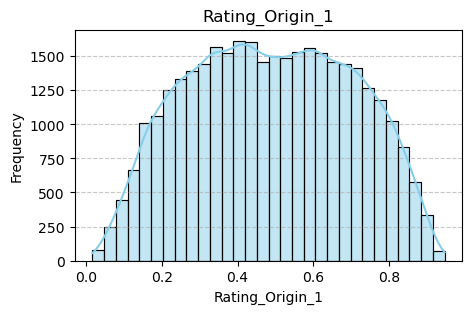

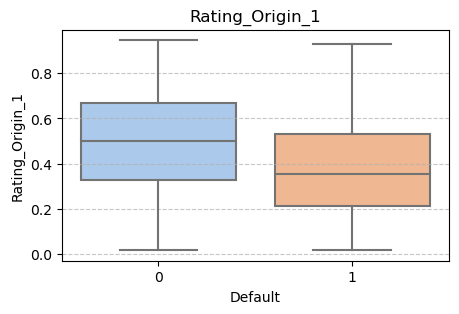

In [2650]:
plot_feature("Rating_Origin_1", False)

In [2651]:
mode_impute("Rating_Origin_1")

'Imputed by mode of the feature, the null values remaining are 0'

##### Rating_Origin_2

In [2652]:
df["Rating_Origin_2"].value_counts()

0.285898    192
0.262258     98
0.159679     94
0.265256     83
0.265312     78
           ... 
0.502506      1
0.532217      1
0.422040      1
0.661554      1
0.556414      1
Name: Rating_Origin_2, Length: 50505, dtype: int64

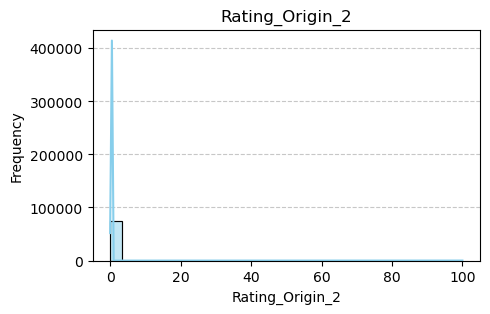

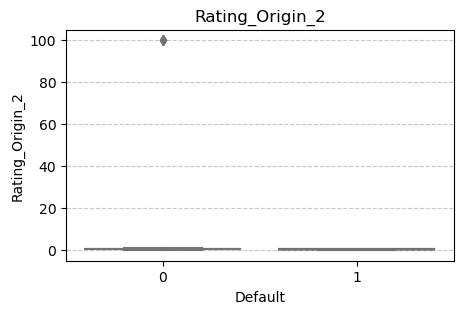

In [2653]:
plot_feature("Rating_Origin_2", False)

In [2654]:
mode_impute("Rating_Origin_2")

'Imputed by mode of the feature, the null values remaining are 0'

##### Rating_Origin_3

In [2655]:
df["Rating_Origin_3"].value_counts()

0.746300    349
0.694093    341
0.713631    323
0.554947    302
0.670652    300
           ... 
0.877194      1
0.029696      1
0.037378      1
0.049943      1
0.030326      1
Name: Rating_Origin_3, Length: 758, dtype: int64

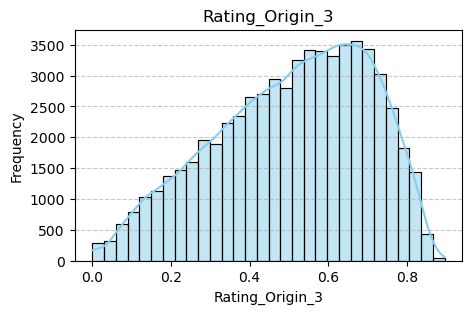

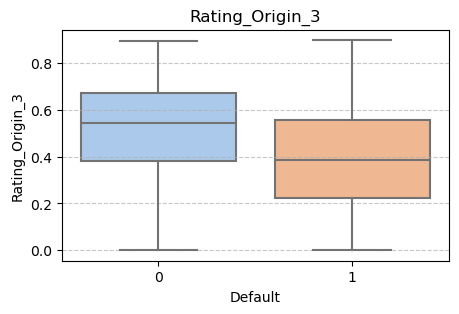

In [2656]:
plot_feature("Rating_Origin_3", False)

In [2657]:
mode_impute("Rating_Origin_3")

'Imputed by mode of the feature, the null values remaining are 0'

##### Community_Non-Payment_Incidence

In [2658]:
df["Community_Non-Payment_Incidence"]


0         0.0186
2         0.0742
3            NaN
5         0.0639
7            NaN
           ...  
121849    0.3340
121850    0.0515
121853       NaN
121854    0.0979
121855    0.1031
Name: Community_Non-Payment_Incidence, Length: 79065, dtype: float64

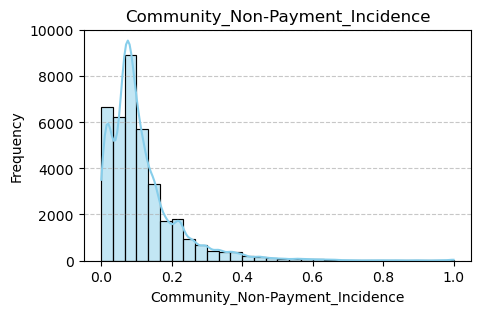

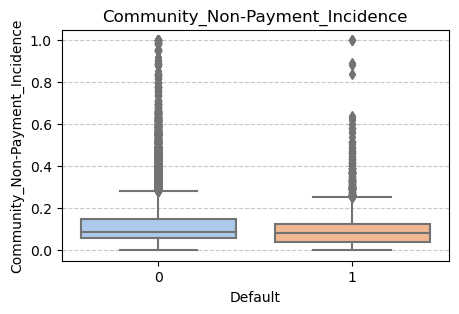

In [2659]:
plot_feature("Community_Non-Payment_Incidence", False)

In [2660]:
median_impute("Community_Non-Payment_Incidence")

'Imputed by median of the feature, the null values remaining are 0'

##### Telecommunication_Switch

In [2661]:

corr_def('Telecommunication_Switch')

Negative correlation of -0.055924279580595586 with the default status


In [2662]:
#Dropping this feature 

feature_to_be_removed.append("Telecommunication_Switch")

##### Solvency_Information_Agency

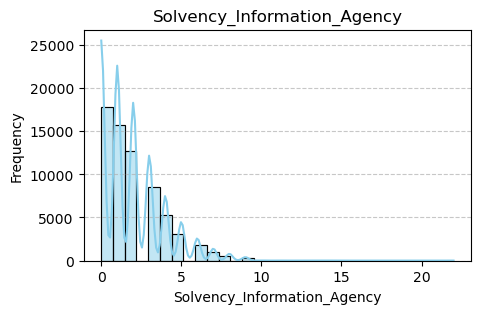

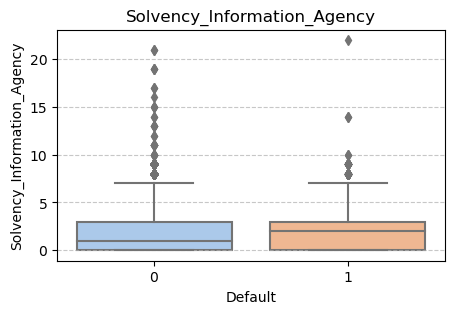

In [2663]:
plot_feature("Solvency_Information_Agency", False)

In [2664]:
mode_impute("Solvency_Information_Agency")

'Imputed by mode of the feature, the null values remaining are 0'

##### Remove _ features

In [2665]:
print(feature_to_be_removed)

['ID', 'Population_Fraction_by_Region', 'Private_Dwelling_Duration', 'Cellphone_Marker', 'Residential_Phone_Marker', 'Employment_Phone_Operation', 'Request_Submission_Day', 'Request_Submission_Hour', 'Patron_Constant_Correspondence_Marker', 'Customer_Professional_Communication_Marker', 'Telecommunication_Switch']


In [2666]:
len(set(feature_to_be_removed))

11

In [2667]:
#Drop them
df_selected = df.drop(list(set(feature_to_be_removed)), axis = 1)


In [2668]:
df_selected.shape


(79065, 28)

In [2669]:
df_dtypes = pd.merge(df_selected.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         df_selected.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

In [2670]:
df_dtypes.sort_values(['missing_value', 'feature_type'])


,index,missing_value,feature_type
27,Default,0,int64
0,Patron_Salary,0,float64
1,Community_Non-Payment_Incidence,0,float64
2,Rating_Origin_3,0,float64
3,Rating_Origin_2,0,float64
4,Rating_Origin_1,0,float64
6,Customer_Urban_Area_Ranking,0,float64
7,Patron_Kin_Count,0,float64
9,Identity_Age_in_Days,0,float64
10,Enlistment_Period_in_Days,0,float64


In [2671]:
df_selected.columns

Index(['Patron_Salary', 'Automobile_Possession', 'Two-Wheeler_Ownership',
       'Ongoing_Borrowing', 'Residence_Proprietorship', 'Offspring_Number',
       'Loan_Capital', 'Borrowing_Periodic_Payment',
       'Customer_Revenue_Category', 'Patron_Academic_Qualification',
       'Customer_Conjugal_State', 'Patron_Sex', 'Borrowing_Agreement_Category',
       'Customer_Living_Arrangement', 'Elderliness_in_Days',
       'Work_Duration_in_Days', 'Enlistment_Period_in_Days',
       'Identity_Age_in_Days', 'Customer_Vocation', 'Patron_Kin_Count',
       'Customer_Urban_Area_Ranking', 'Sort_of_Institution', 'Rating_Origin_1',
       'Rating_Origin_2', 'Rating_Origin_3', 'Community_Non-Payment_Incidence',
       'Solvency_Information_Agency', 'Default'],
      dtype='object')

In [2682]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79065 entries, 0 to 121855
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patron_Salary                    79065 non-null  float64
 1   Automobile_Possession            79065 non-null  float64
 2   Two-Wheeler_Ownership            79065 non-null  float64
 3   Ongoing_Borrowing                79065 non-null  float64
 4   Residence_Proprietorship         79065 non-null  float64
 5   Offspring_Number                 79065 non-null  float64
 6   Loan_Capital                     79065 non-null  float64
 7   Borrowing_Periodic_Payment       79065 non-null  float64
 8   Customer_Revenue_Category        79065 non-null  object 
 9   Patron_Academic_Qualification    79065 non-null  object 
 10  Customer_Conjugal_State          79065 non-null  object 
 11  Patron_Sex                       79065 non-null  object 
 12  Borrowing_Agreeme

In [2683]:
df_selected.isnull().sum()

Patron_Salary                      0
Automobile_Possession              0
Two-Wheeler_Ownership              0
Ongoing_Borrowing                  0
Residence_Proprietorship           0
Offspring_Number                   0
Loan_Capital                       0
Borrowing_Periodic_Payment         0
Customer_Revenue_Category          0
Patron_Academic_Qualification      0
Customer_Conjugal_State            0
Patron_Sex                         0
Borrowing_Agreement_Category       0
Customer_Living_Arrangement        0
Elderliness_in_Days                0
Work_Duration_in_Days              0
Enlistment_Period_in_Days          0
Identity_Age_in_Days               0
Customer_Vocation                  0
Patron_Kin_Count                   0
Customer_Urban_Area_Ranking        0
Sort_of_Institution                0
Rating_Origin_1                    0
Rating_Origin_2                    0
Rating_Origin_3                    0
Community_Non-Payment_Incidence    0
Solvency_Information_Agency        0
D

In [2674]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ID - 0%
Patron_Salary - 0%
Automobile_Possession - 0%
Two-Wheeler_Ownership - 0%
Ongoing_Borrowing - 0%
Residence_Proprietorship - 0%
Offspring_Number - 0%
Loan_Capital - 0%
Borrowing_Periodic_Payment - 0%
Customer_Revenue_Category - 0%
Patron_Academic_Qualification - 0%
Customer_Conjugal_State - 0%
Patron_Sex - 0%
Borrowing_Agreement_Category - 0%
Customer_Living_Arrangement - 0%
Population_Fraction_by_Region - 4%
Elderliness_in_Days - 0%
Work_Duration_in_Days - 0%
Enlistment_Period_in_Days - 0%
Identity_Age_in_Days - 0%
Private_Dwelling_Duration - 68%
Cellphone_Marker - 0%
Residential_Phone_Marker - 0%
Employment_Phone_Operation - 0%
Customer_Vocation - 0%
Patron_Kin_Count - 0%
Customer_Urban_Area_Ranking - 0%
Request_Submission_Day - 2%
Request_Submission_Hour - 3%
Patron_Constant_Correspondence_Marker - 0%
Customer_Professional_Communication_Marker - 0%
Sort_of_Institution - 0%
Rating_Origin_1 - 0%
Rating_Origin_2 - 0%
Rating_Origin_3 - 0%
Community_Non-Payment_Incidence - 0%
Telec

### Feature Encoding

In [2702]:
df_selected.iloc[:5, :14]

,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification,Customer_Conjugal_State,Patron_Sex,Borrowing_Agreement_Category,Customer_Living_Arrangement
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,0,4,M,1,0,1
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,4,1,W,1,0,0
3,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,3,4,M,1,0,1
5,11250.0,0.0,1.0,1.0,1.0,1.0,13752.00,653.85,4,4,W,0,0,1
7,13500.0,0.0,0.0,1.0,1.0,0.0,60415.20,3097.80,3,4,M,1,0,1


In [2696]:
def cat_encode(col_name):
    df_selected[col_name] = pd.Categorical(df_selected[col_name], categories=np.unique(df_selected[col_name])).codes

In [2703]:
cat_encode('Customer_Revenue_Category')
cat_encode('Patron_Academic_Qualification')
cat_encode('Customer_Vocation')
cat_encode('Sort_of_Institution')
cat_encode('Patron_Sex')
cat_encode('Borrowing_Agreement_Category')
cat_encode('Customer_Living_Arrangement')
cat_encode('Customer_Conjugal_State')

### Feature Correlation

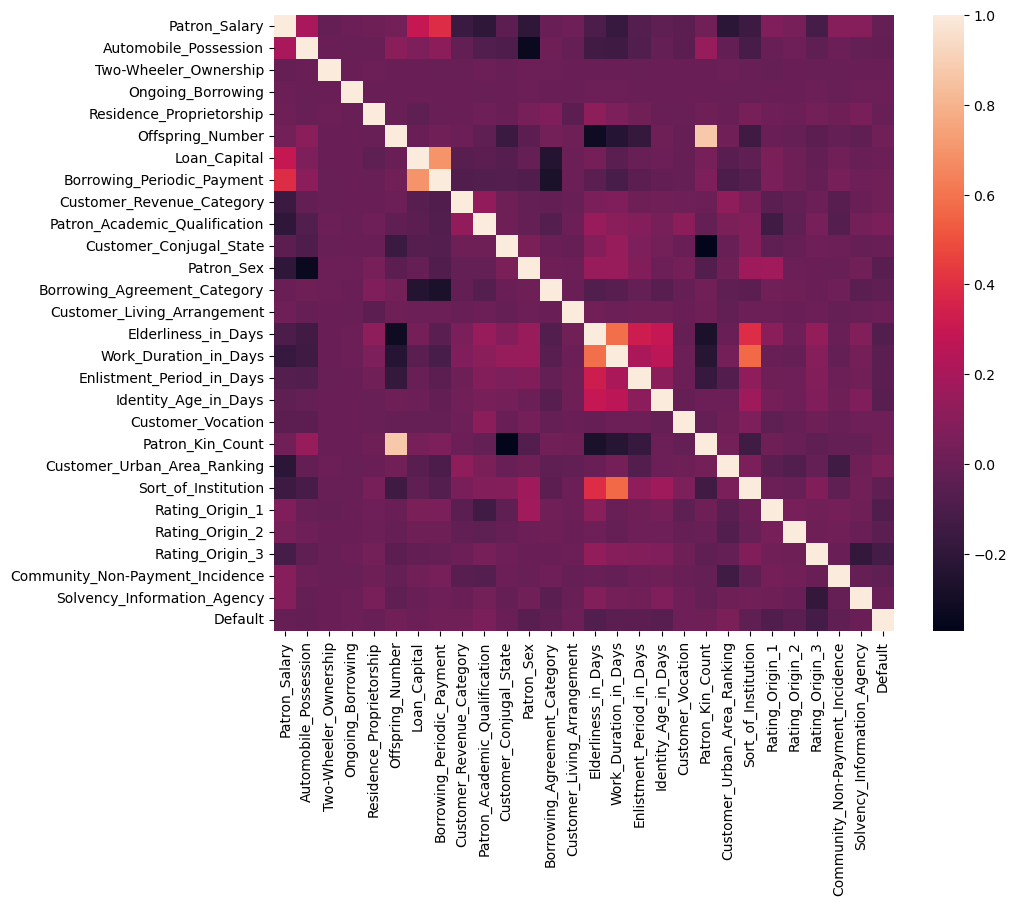

In [2705]:
corr = df_selected.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr)
plt.show()


In [2707]:
corr['Default'].sort_values(ascending = False).to_frame('corr_value').reset_index()

,index,corr_value
0,Default,1.000000
1,Customer_Urban_Area_Ranking,0.059966
2,Patron_Academic_Qualification,0.056905
3,Customer_Revenue_Category,0.027008
4,Borrowing_Periodic_Payment,0.024072
5,Offspring_Number,0.021558
6,Customer_Vocation,0.018094
7,Patron_Kin_Count,0.013991
8,Loan_Capital,0.007446
9,Customer_Living_Arrangement,0.006293


##### Finding highly correlated features

In [2708]:
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)

In [2709]:
new_corr[new_corr.correlation > 0.4]


,level_0,level_1,correlation
537,Patron_Kin_Count,Offspring_Number,0.873721
202,Borrowing_Periodic_Payment,Loan_Capital,0.697668
434,Work_Duration_in_Days,Elderliness_in_Days,0.586404
603,Sort_of_Institution,Work_Duration_in_Days,0.567156


Patron_Kin_Count and Offspring_Number are highly correlated

##### Correlation with target variable

In [2710]:
corr_with_target = df_selected.corrwith(df_selected.Default).sort_values(ascending = False).abs().to_frame('correlation_with_target').reset_index().head(20)
unique_values = df_selected.nunique().to_frame('unique_values').reset_index()
corr_with_unique = pd.merge(corr_with_target, unique_values, on = 'index', how = 'inner')

In [2711]:
corr_with_unique

,index,correlation_with_target,unique_values
0,Default,1.000000,2
1,Customer_Urban_Area_Ranking,0.059966,3
2,Patron_Academic_Qualification,0.056905,5
3,Customer_Revenue_Category,0.027008,7
4,Borrowing_Periodic_Payment,0.024072,8375
5,Offspring_Number,0.021558,5
6,Customer_Vocation,0.018094,18
7,Patron_Kin_Count,0.013991,6
8,Loan_Capital,0.007446,2541
9,Customer_Living_Arrangement,0.006293,6


#### Save selected features

In [2704]:
df_selected.to_csv("CleanData.csv")
